In [ ]:
import zipfile
import os

zip_path = "/content/AI_Code_Review_Project.zip"
extract_path = "/content/python_dataset/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)



In [ ]:
base_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/"

folders = {
    "open_source": base_path + "open_source/",
    "code_smells": base_path + "code_smells/",
    "algorithms": base_path + "algorithms/",
    "security": base_path + "security/",
    "ai_generated_open_source": base_path + "ai_generated/open_source/",
    "ai_generated_code_smells": base_path + "ai_generated/code_smells/",
    "ai_generated_algorithms": base_path + "ai_generated/algorithms/",
    "ai_generated_security": base_path + "ai_generated/security/"
}


for name, path in folders.items():
    print(name, ":", len(os.listdir(path)), "files")

open_source : 10 files
code_smells : 10 files
algorithms : 10 files
security : 10 files
ai_generated_open_source : 10 files
ai_generated_code_smells : 10 files
ai_generated_algorithms : 10 files
ai_generated_security : 10 files


In [ ]:
import os


open_source_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/open_source/"


open_source_files = [f for f in os.listdir(open_source_path) if f.endswith(".py")]
print("Open Source files:", open_source_files)


Open Source files: ['rich_text.py', 'requests_utils.py', 'click_utils.py', 'colorama_init.py', 'bs4_element.py', 'flask_helpers.py', 'fire_core.py', 'pydantic_utils.py', 'typer_main.py', 'schedule_core.py']


In [ ]:
import os
import ast
import matplotlib.pyplot as plt


open_source_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/open_source/"


open_source_files = ['flask_helpers.py', 'colorama_init.py', 'requests_utils.py', 'pydantic_utils.py',
                     'bs4_element.py', 'rich_text.py', 'fire_core.py', 'typer_main.py', 'schedule_core.py', 'click_utils.py']

def analyze_code_quality(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()

    issues = []
    score = 100


    long_lines = [i+1 for i, line in enumerate(code.splitlines()) if len(line) > 120]
    if long_lines:
        issues.append(f"Long lines at: {long_lines}")
        score -= min(5*len(long_lines), 20)


    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError: Possibly Python 2 code, cannot analyze automatically")
        score -= 30
        return {"score": score, "issues": issues}


    if not (ast.get_docstring(tree)):
        issues.append("Missing module docstring")
        score -= 10

    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if len(node.body) > 20:
            issues.append(f"Function '{node.name}' too long ({len(node.body)} lines)")
            score -= 5


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if not node.name.islower() or "_" not in node.name:
            issues.append(f"Function '{node.name}' naming not snake_case")
            score -= 2


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.ClassDef)]:
        if not node.name[0].isupper() or "_" in node.name:
            issues.append(f"Class '{node.name}' naming not CamelCase")
            score -= 2

    score = max(score, 0)
    return {"score": score, "issues": issues}

results = {}
for f in open_source_files:
    path = os.path.join(open_source_path, f)
    results[f] = analyze_code_quality(path)


<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


In [ ]:
for f, r in results.items():
    print(f"File: {f}")
    print(f"  Code Quality Score: {r['score']}%")
    if r['issues']:
        for issue in r['issues']:
            print(f"  - {issue}")
    else:
        print("  No major issues detected.")
    print("-"*50)


File: flask_helpers.py
  Code Quality Score: 88%
  - Missing module docstring
  - Class 'newcls' naming not CamelCase
--------------------------------------------------
File: colorama_init.py
  Code Quality Score: 84%
  - Missing module docstring
  - Function 'init' naming not snake_case
  - Function 'deinit' naming not snake_case
  - Function 'reinit' naming not snake_case
--------------------------------------------------
File: requests_utils.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: pydantic_utils.py
  Code Quality Score: 92%
  - Function 'merge' naming not snake_case
  - Function 'LazyClassAttribute' naming not snake_case
  - Function 'value' naming not snake_case
  - Class 'deprecated_instance_property' naming not CamelCase
--------------------------------------------------
File: bs4_element.py
  Code Quality Score: 70%
  - SyntaxError: Possibly Python 2 code, cannot analyze automatically
--------------------

In [ ]:
all_scores = [r["score"] for r in results.values()]
overall_score = sum(all_scores) / len(all_scores)

recommendations = [
    "Add module docstrings to improve documentation",
    "Refactor long functions to enhance readability and maintainability",
    "Use snake_case for function names and CamelCase for class names",
    "Shorten excessively long lines (<120 chars) for readability"
]

print(f"Overall Code Quality Score: {overall_score:.2f}%")
print("Recommended Improvements:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


Overall Code Quality Score: 76.40%
Recommended Improvements:
1. Add module docstrings to improve documentation
2. Refactor long functions to enhance readability and maintainability
3. Use snake_case for function names and CamelCase for class names
4. Shorten excessively long lines (<120 chars) for readability


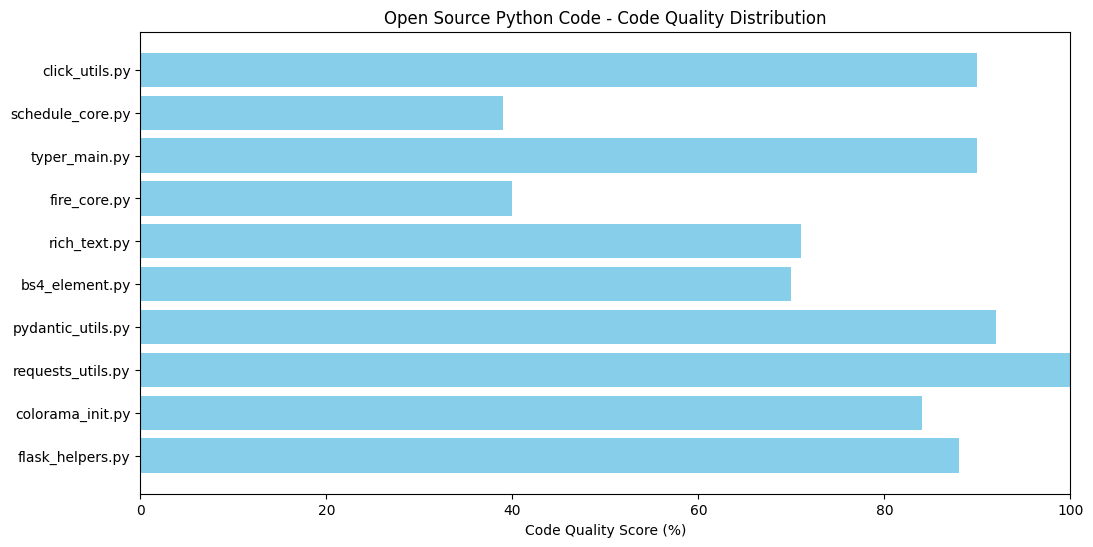

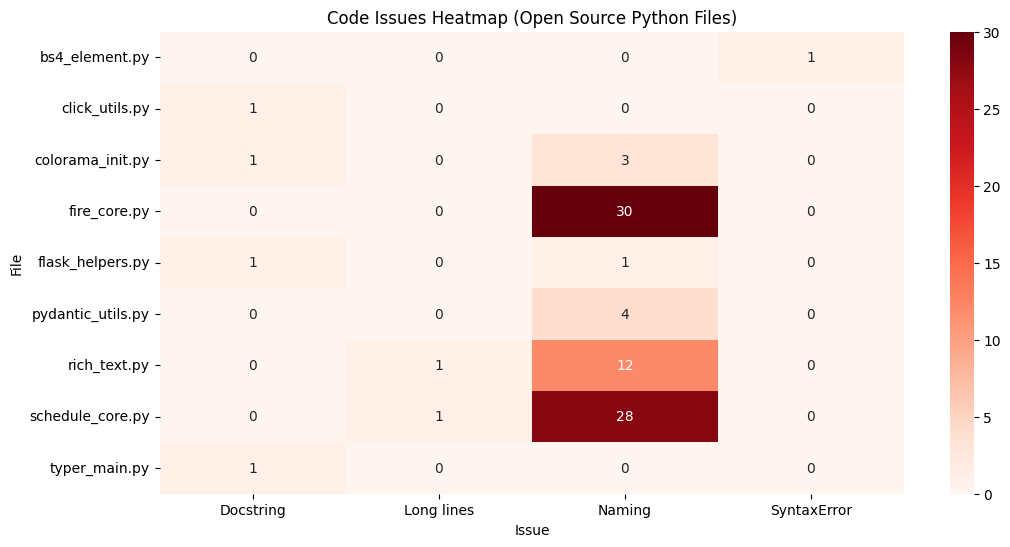

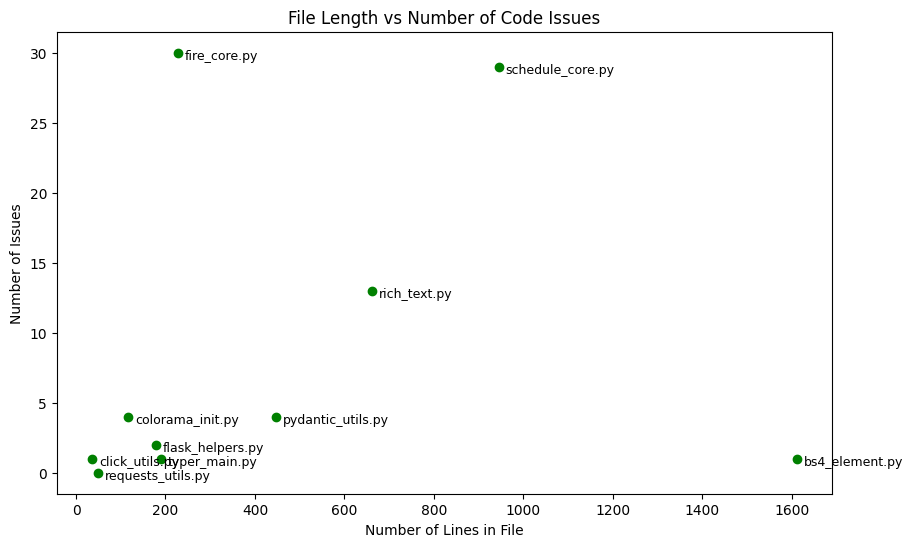

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


file_names = list(results.keys())
scores = [r["score"] for r in results.values()]


issue_types = []
for r in results.values():
    for issue in r["issues"]:
        if "Long lines" in issue:
            issue_types.append("Long lines")
        elif "naming not snake_case" in issue or "naming not CamelCase" in issue:
            issue_types.append("Naming")
        elif "docstring" in issue:
            issue_types.append("Docstring")
        elif "too long" in issue:
            issue_types.append("Function Length")
        elif "SyntaxError" in issue:
            issue_types.append("SyntaxError")
        else:
            issue_types.append("Other")

issue_df = pd.DataFrame({"File": [f for f, r in results.items() for _ in r["issues"]],
                         "Issue": issue_types})


plt.figure(figsize=(12,6))
plt.barh(file_names, scores, color='skyblue')
plt.xlabel("Code Quality Score (%)")
plt.title("Open Source Python Code - Code Quality Distribution")
plt.xlim(0,100)
plt.show()


heatmap_data = pd.crosstab(issue_df["File"], issue_df["Issue"])
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Code Issues Heatmap (Open Source Python Files)")
plt.show()


file_lengths = []
num_issues = []

for f in file_names:
    with open(os.path.join(open_source_path, f), "r", encoding="utf-8") as file:
        lines = file.readlines()
        file_lengths.append(len(lines))
    num_issues.append(len(results[f]["issues"]))

plt.figure(figsize=(10,6))
plt.scatter(file_lengths, num_issues, color='green')
for i, txt in enumerate(file_names):
    plt.annotate(txt, (file_lengths[i], num_issues[i]), xytext=(5,-5), textcoords='offset points', fontsize=9)
plt.xlabel("Number of Lines in File")
plt.ylabel("Number of Issues")
plt.title("File Length vs Number of Code Issues")
plt.show()


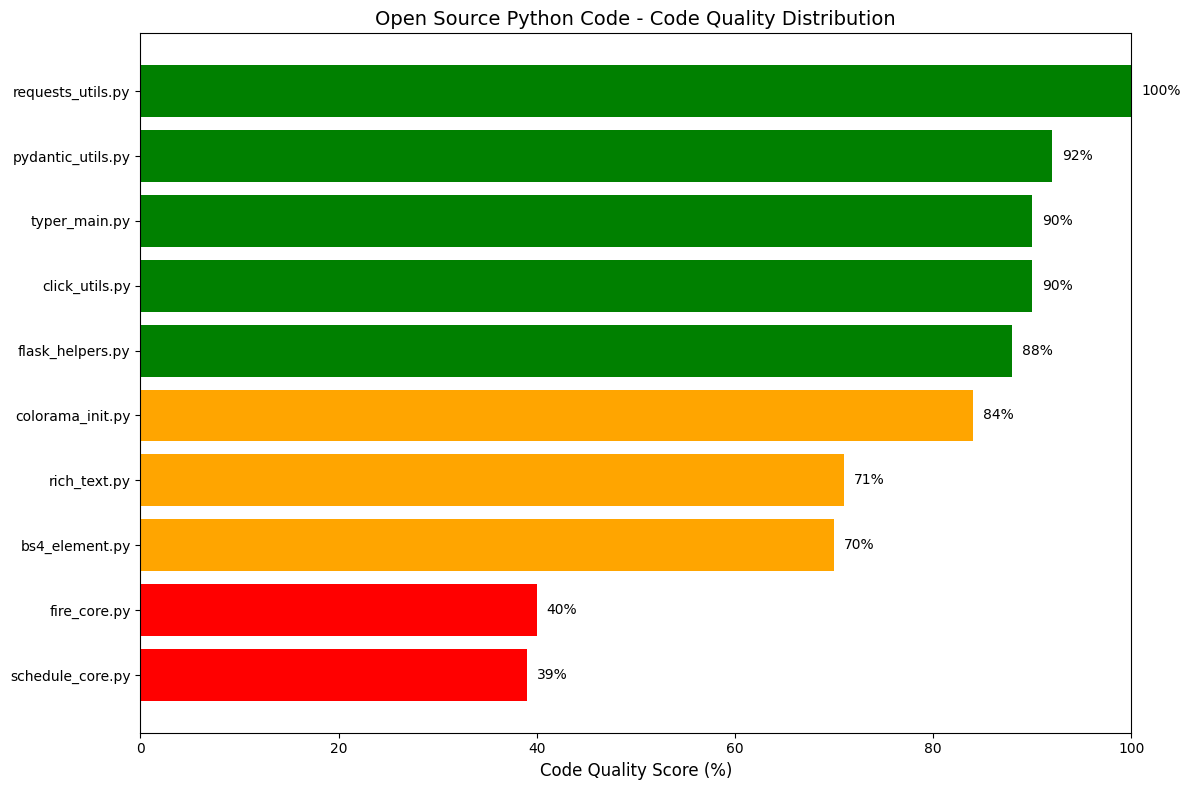

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

file_names = list(results.keys())
scores = [r["score"] for r in results.values()]


sorted_idx = np.argsort(scores)
file_names_sorted = [file_names[i] for i in sorted_idx]
scores_sorted = [scores[i] for i in sorted_idx]


colors = []
for s in scores_sorted:
    if s >= 85:
        colors.append("green")
    elif s >= 70:
        colors.append("orange")
    else:
        colors.append("red")

plt.figure(figsize=(12,8))
bars = plt.barh(file_names_sorted, scores_sorted, color=colors)
plt.xlabel("Code Quality Score (%)", fontsize=12)
plt.title("Open Source Python Code - Code Quality Distribution", fontsize=14)
plt.xlim(0,100)


for bar, score in zip(bars, scores_sorted):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{score}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
code_smells_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/code_smells/"
import os

code_smells_files = [f for f in os.listdir(code_smells_path) if f.endswith(".py")]
print("Code Smells files:", code_smells_files)


Code Smells files: ['osinfo.py', 'scikit-learn_realpython_long_function.py', 'thealgorithms_bubble_sort.py', 'logs_1.py', 'fileinfo.py', 'folder_size.py', 'batch_file_rename.py', 'logs_2.py', 'nslookup_check.py', 'create_dir_if_not_there.py']


File: create_dir_if_not_there.py
  Code Quality Score: 90%
  - Missing module docstring
--------------------------------------------------
File: logs_1.py
  Code Quality Score: 75%
  - Long lines at: [7, 10, 22]
  - Missing module docstring
--------------------------------------------------
File: folder_size.py
  Code Quality Score: 85%
  - Long lines at: [30]
  - Missing module docstring
--------------------------------------------------
File: osinfo.py
  Code Quality Score: 78%
  - Long lines at: [2, 7]
  - Missing module docstring
  - Class 'bcolors' naming not CamelCase
--------------------------------------------------
File: fileinfo.py
  Code Quality Score: 90%
  - Missing module docstring
--------------------------------------------------
File: scikit-learn_realpython_long_function.py
  Code Quality Score: 89%
  - Function 'check_array' too long (25 lines)
  - Function 'indexable' naming not snake_case
  - Function 'check_X_y' naming not snake_case
  - Function 'check' naming no

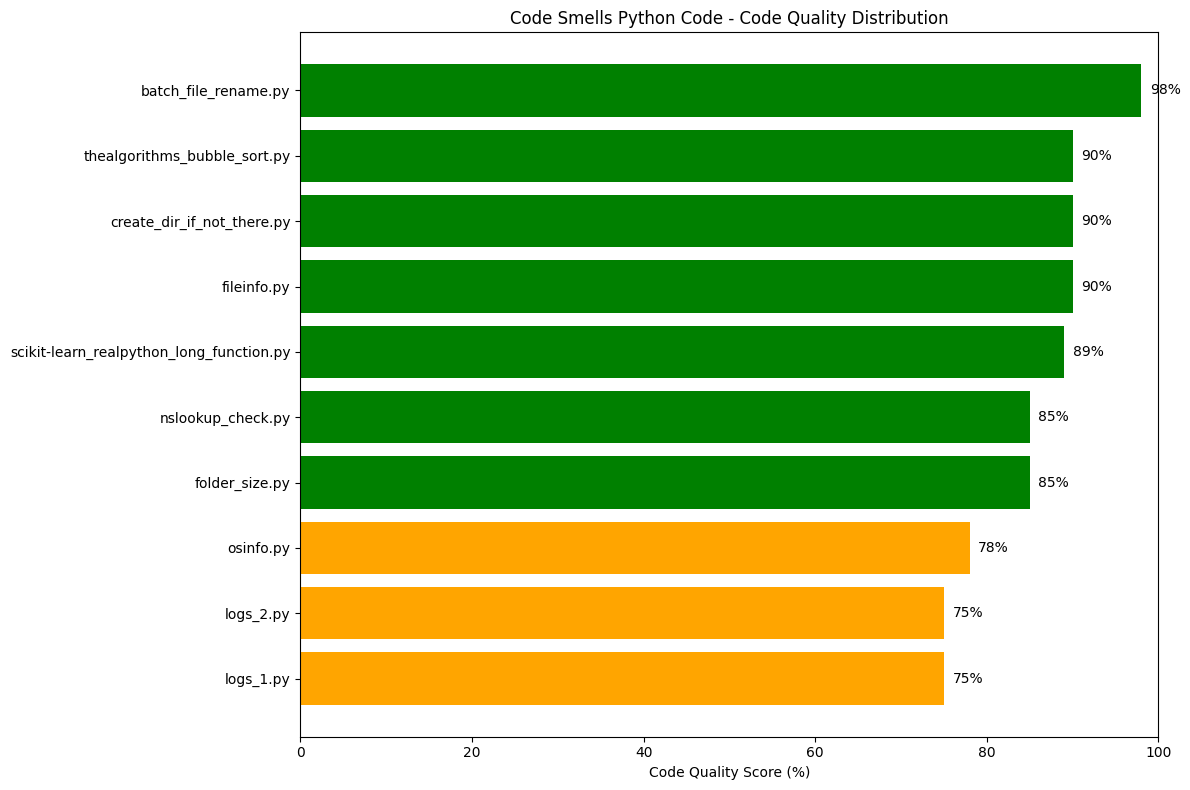

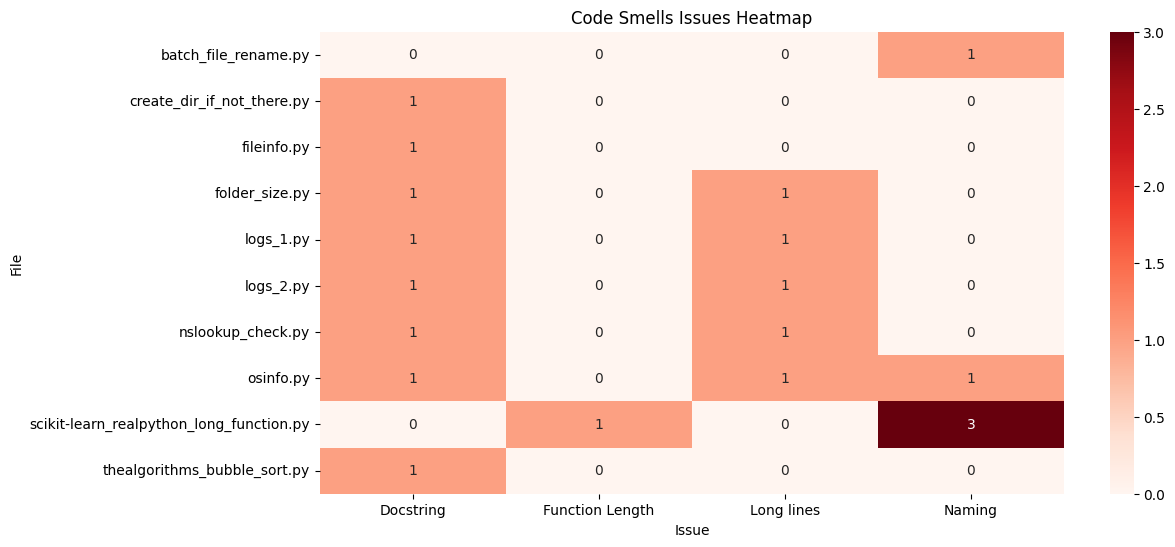

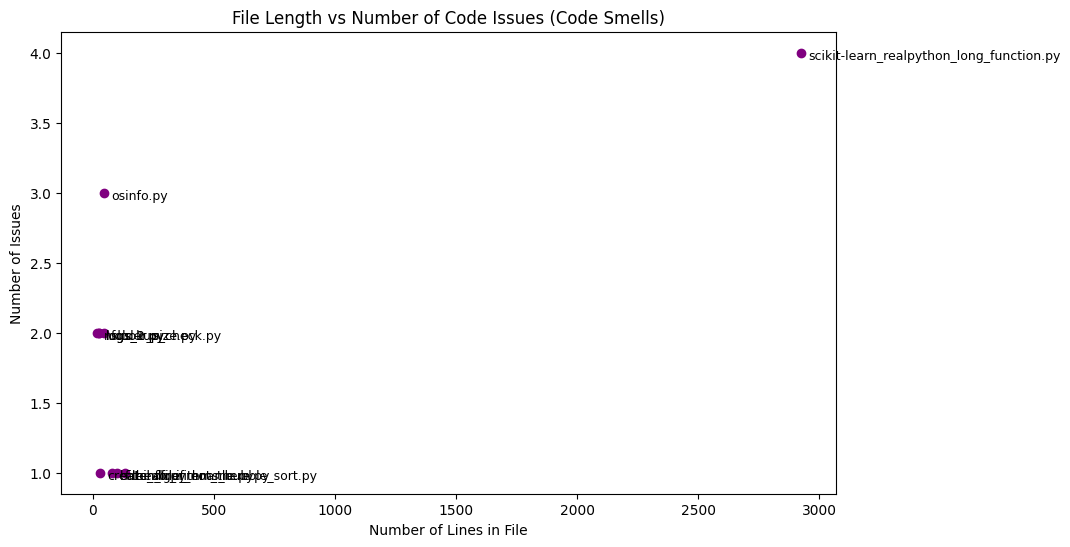

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


code_smells_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/code_smells/"
code_smells_files = ['create_dir_if_not_there.py', 'logs_1.py',
                     'folder_size.py', 'osinfo.py', 'fileinfo.py', 'scikit-learn_realpython_long_function.py',
                     'logs_2.py', 'batch_file_rename.py', 'nslookup_check.py', 'thealgorithms_bubble_sort.py']


def analyze_code_quality(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()

    issues = []
    score = 100

    long_lines = [i+1 for i, line in enumerate(code.splitlines()) if len(line) > 120]
    if long_lines:
        issues.append(f"Long lines at: {long_lines}")
        score -= min(5*len(long_lines), 20)


    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError: Possibly Python 2 code, cannot analyze automatically")
        score -= 30
        return {"score": score, "issues": issues}


    if not (ast.get_docstring(tree)):
        issues.append("Missing module docstring")
        score -= 10


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if len(node.body) > 20:
            issues.append(f"Function '{node.name}' too long ({len(node.body)} lines)")
            score -= 5


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if not node.name.islower() or "_" not in node.name:
            issues.append(f"Function '{node.name}' naming not snake_case")
            score -= 2


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.ClassDef)]:
        if not node.name[0].isupper() or "_" in node.name:
            issues.append(f"Class '{node.name}' naming not CamelCase")
            score -= 2

    score = max(score, 0)
    return {"score": score, "issues": issues}


results = {}
for f in code_smells_files:
    path = os.path.join(code_smells_path, f)
    results[f] = analyze_code_quality(path)


for f, r in results.items():
    print(f"File: {f}")
    print(f"  Code Quality Score: {r['score']}%")
    if r['issues']:
        for issue in r['issues']:
            print(f"  - {issue}")
    else:
        print("  No major issues detected.")
    print("-"*50)


all_scores = [r["score"] for r in results.values()]
overall_score = sum(all_scores) / len(all_scores)

recommendations = [
    "Add module docstrings to improve documentation",
    "Refactor long functions to enhance readability and maintainability",
    "Use snake_case for function names and CamelCase for class names",
    "Shorten excessively long lines (<120 chars) for readability"
]

print(f"\nOverall Code Quality Score: {overall_score:.2f}%")
print("Recommended Improvements:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


file_names = list(results.keys())
scores = [r["score"] for r in results.values()]

sorted_idx = np.argsort(scores)
file_names_sorted = [file_names[i] for i in sorted_idx]
scores_sorted = [scores[i] for i in sorted_idx]

colors = []
for s in scores_sorted:
    if s >= 85:
        colors.append("green")
    elif s >= 70:
        colors.append("orange")
    else:
        colors.append("red")

plt.figure(figsize=(12,8))
bars = plt.barh(file_names_sorted, scores_sorted, color=colors)
plt.xlabel("Code Quality Score (%)")
plt.title("Code Smells Python Code - Code Quality Distribution")
plt.xlim(0,100)
for bar, score in zip(bars, scores_sorted):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{score}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()


issue_types = []
for r in results.values():
    for issue in r["issues"]:
        if "Long lines" in issue:
            issue_types.append("Long lines")
        elif "naming not snake_case" in issue or "naming not CamelCase" in issue:
            issue_types.append("Naming")
        elif "docstring" in issue.lower():
            issue_types.append("Docstring")
        elif "too long" in issue:
            issue_types.append("Function Length")
        elif "SyntaxError" in issue:
            issue_types.append("SyntaxError")
        else:
            issue_types.append("Other")

issue_df = pd.DataFrame({"File": [f for f, r in results.items() for _ in r["issues"]],
                         "Issue": issue_types})

heatmap_data = pd.crosstab(issue_df["File"], issue_df["Issue"])
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Reds")
plt.title("Code Smells Issues Heatmap")
plt.show()


file_lengths = []
num_issues = []

for f in file_names:
    with open(os.path.join(code_smells_path, f), "r", encoding="utf-8") as file:
        lines = file.readlines()
        file_lengths.append(len(lines))
    num_issues.append(len(results[f]["issues"]))

plt.figure(figsize=(10,6))
plt.scatter(file_lengths, num_issues, color='purple')
for i, txt in enumerate(file_names):
    plt.annotate(txt, (file_lengths[i], num_issues[i]), xytext=(5,-5), textcoords='offset points', fontsize=9)
plt.xlabel("Number of Lines in File")
plt.ylabel("Number of Issues")
plt.title("File Length vs Number of Code Issues (Code Smells)")
plt.show()

In [ ]:
import os

algorithms_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/algorithms/"


algorithms_files = [f for f in os.listdir(algorithms_path) if f.endswith(".py")]
print("Algorithms files:", algorithms_files)


Algorithms files: ['heap_sort.py', 'selection_sort.py', 'shell_sort.py', 'quick_sort.py', 'insertion_sort.py', 'merge_sort.py', 'sentinel_linear_search.py', 'bucket_sort.py', 'binary_search.py', 'gnome_sort.py']


File: heap_sort.py
  Code Quality Score: 98%
  - Function 'heapify' naming not snake_case
--------------------------------------------------
File: quick_sort.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: gnome_sort.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: sentinel_linear_search.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: insertion_sort.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: binary_search.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: shell_sort.py
  Code Quality Score: 100%
  No major issues detected.
--------------------------------------------------
File: bucket_sort.py
  Code Quality Score: 100%
  No major issues detected.
--------

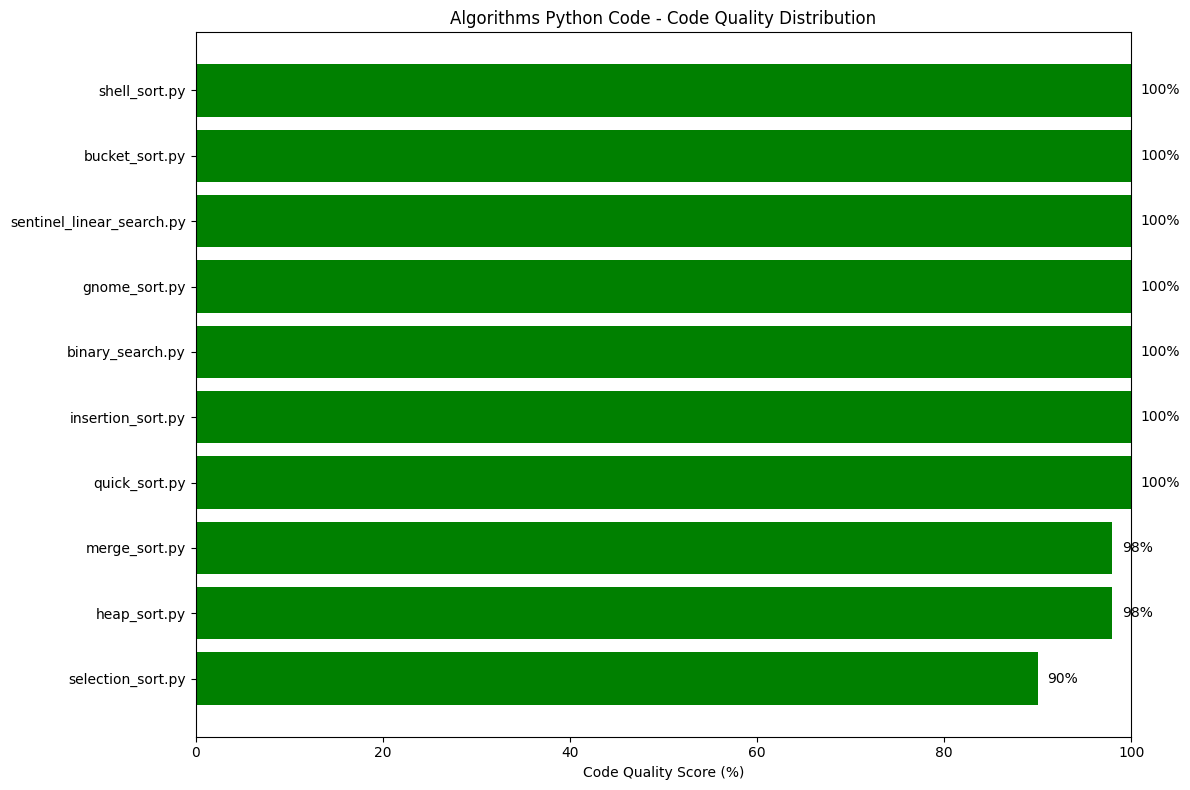

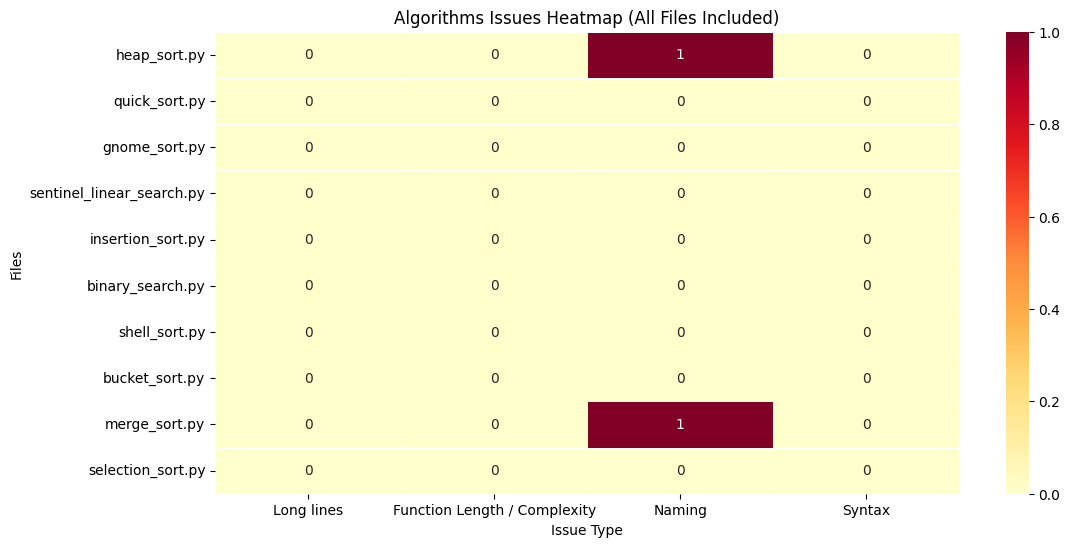

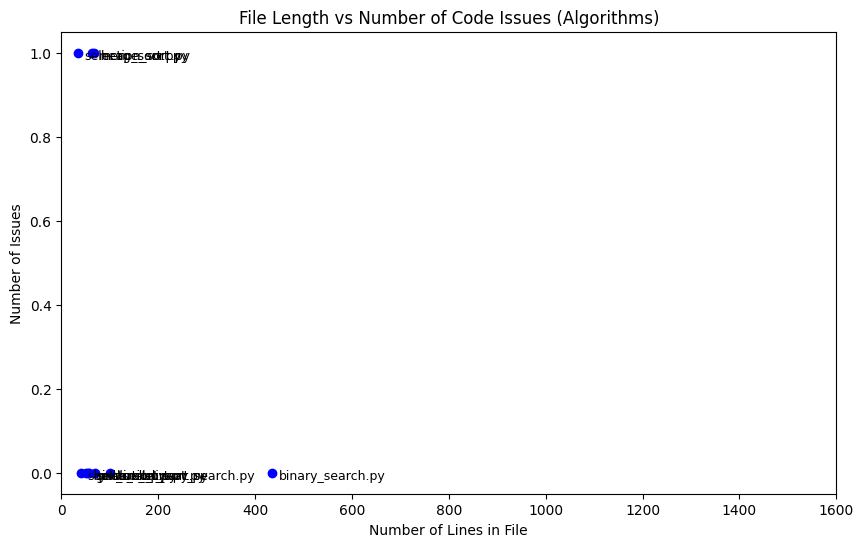

In [ ]:

import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


algorithms_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/algorithms/"


algorithms_files = ['heap_sort.py', 'quick_sort.py', 'gnome_sort.py', 'sentinel_linear_search.py',
                    'insertion_sort.py', 'binary_search.py', 'shell_sort.py', 'bucket_sort.py',
                    'merge_sort.py', 'selection_sort.py']


def analyze_algorithm_code(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()

    issues = []
    score = 100


    long_lines = [i+1 for i, line in enumerate(code.splitlines()) if len(line) > 120]
    if long_lines:
        issues.append(f"Long lines at: {long_lines}")
        score -= min(5*len(long_lines), 20)

    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError: Possibly Python 2 code, cannot analyze automatically")
        score -= 30
        return {"score": score, "issues": issues}


    if not ast.get_docstring(tree):
        issues.append("Missing module docstring")
        score -= 10


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if len(node.body) > 20:
            issues.append(f"Function '{node.name}' too long ({len(node.body)} lines)")
            score -= 5


    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if not node.name.islower() or "_" not in node.name:
            issues.append(f"Function '{node.name}' naming not snake_case")
            score -= 2

    score = max(score, 0)
    return {"score": score, "issues": issues}


results = {}
for f in algorithms_files:
    path = os.path.join(algorithms_path, f)
    results[f] = analyze_algorithm_code(path)


for f, r in results.items():
    print(f"File: {f}")
    print(f"  Code Quality Score: {r['score']}%")
    if r['issues']:
        for issue in r['issues']:
            print(f"  - {issue}")
    else:
        print("  No major issues detected.")
    print("-"*50)

all_scores = [r["score"] for r in results.values()]
overall_score = sum(all_scores) / len(all_scores)

recommendations = [
    "Add module docstrings to improve documentation",
    "Refactor long functions to enhance readability and maintainability",
    "Use snake_case for function names",
    "Shorten excessively long lines (<120 chars) for readability"
]

print(f"\nOverall Code Quality Score: {overall_score:.2f}%")
print("Recommended Improvements:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


file_names = list(results.keys())
scores = [r["score"] for r in results.values()]

sorted_idx = np.argsort(scores)
file_names_sorted = [file_names[i] for i in sorted_idx]
scores_sorted = [scores[i] for i in sorted_idx]

colors = []
for s in scores_sorted:
    if s >= 85:
        colors.append("green")
    elif s >= 70:
        colors.append("orange")
    else:
        colors.append("red")

plt.figure(figsize=(12,8))
bars = plt.barh(file_names_sorted, scores_sorted, color=colors)
plt.xlabel("Code Quality Score (%)")
plt.title("Algorithms Python Code - Code Quality Distribution")
plt.xlim(0,100)
for bar, score in zip(bars, scores_sorted):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{score}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()


issue_types_set = ["Long lines", "Function Length / Complexity", "Naming", "Syntax"]


heatmap_df = pd.DataFrame(0, index=algorithms_files, columns=issue_types_set)


for f, r in results.items():
    for issue in r["issues"]:
        if "Long lines" in issue:
            heatmap_df.loc[f, "Long lines"] += 1
        elif "too long" in issue or "Function Length" in issue:
            heatmap_df.loc[f, "Function Length / Complexity"] += 1
        elif "naming not snake_case" in issue or "naming not CamelCase" in issue:
            heatmap_df.loc[f, "Naming"] += 1
        elif "SyntaxError" in issue:
            heatmap_df.loc[f, "Syntax"] += 1


plt.figure(figsize=(12,6))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5)
plt.title("Algorithms Issues Heatmap (All Files Included)")
plt.ylabel("Files")
plt.xlabel("Issue Type")
plt.show()


file_lengths = []
num_issues = []

for f in algorithms_files:
    with open(os.path.join(algorithms_path, f), "r", encoding="utf-8") as file:
        lines = file.readlines()
        file_lengths.append(len(lines))
    num_issues.append(len(results[f]["issues"]))

plt.figure(figsize=(10,6))
plt.scatter(file_lengths, num_issues, color='blue')
for i, txt in enumerate(algorithms_files):
    plt.annotate(txt, (file_lengths[i], num_issues[i]), xytext=(5,-5), textcoords='offset points', fontsize=9)
plt.xlabel("Number of Lines in File")
plt.ylabel("Number of Issues")
plt.title("File Length vs Number of Code Issues (Algorithms)")
plt.xlim(0, 1600)
plt.show()


In [ ]:
import os


security_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/security/"


security_files = [f for f in os.listdir(security_path) if f.endswith(".py")]
print("Security files:", security_files)


Security files: ['ssl_standard.py', 'dynamic_code_injection.py', 'pyjwt.py', 'os_command_injection.py', 'serverside_template_injection.py', 'http_redir_forging.py', 'ldap_injection.py', 'logging_injection.py', 'python_jwt.py', 'print_password.py']


File: os_command_injection.py
  Security Score: 90%
  - Unsafe function used: exec
  - Unsafe function used: os.system
--------------------------------------------------
File: http_redir_forging.py
  Security Score: 100%
  No major issues detected.
--------------------------------------------------
File: logging_injection.py
  Security Score: 100%
  No major issues detected.
--------------------------------------------------
File: dynamic_code_injection.py
  Security Score: 90%
  - Unsafe function used: eval
  - Unsafe function used: exec
--------------------------------------------------
File: serverside_template_injection.py
  Security Score: 100%
  No major issues detected.
--------------------------------------------------
File: ldap_injection.py
  Security Score: 100%
  No major issues detected.
--------------------------------------------------
File: ssl_standard.py
  Security Score: 95%
  - SSL/TLS verification disabled
--------------------------------------------------
File: py

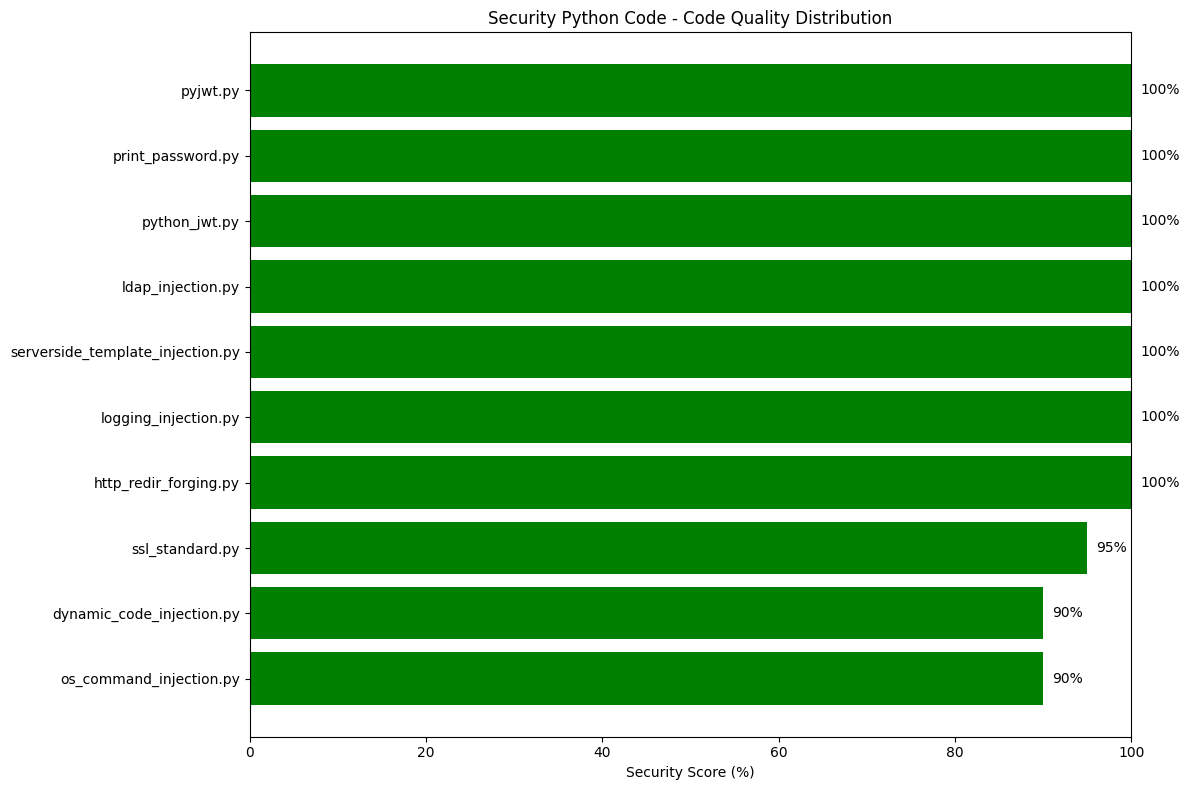

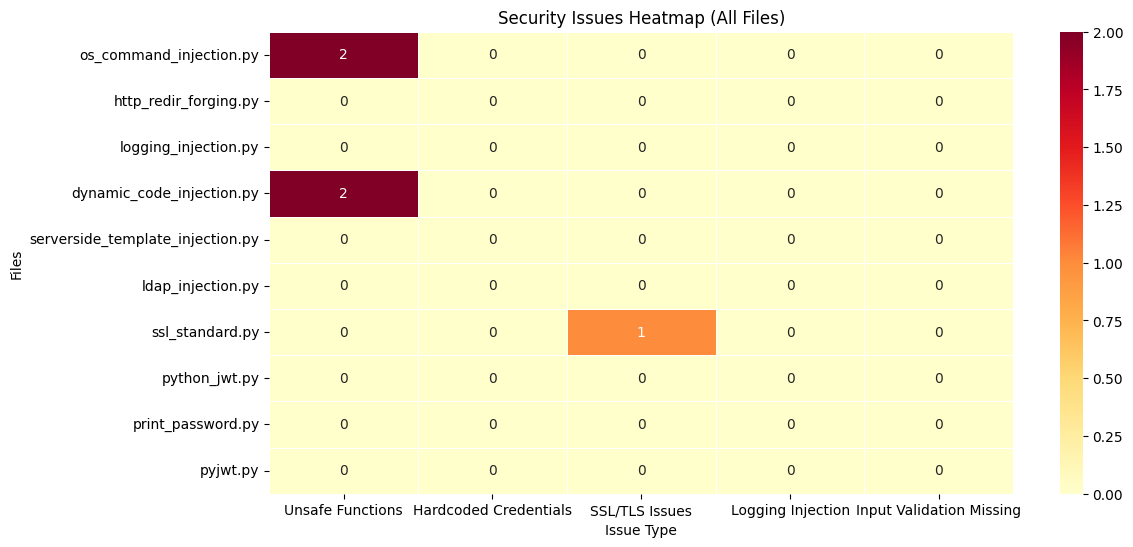

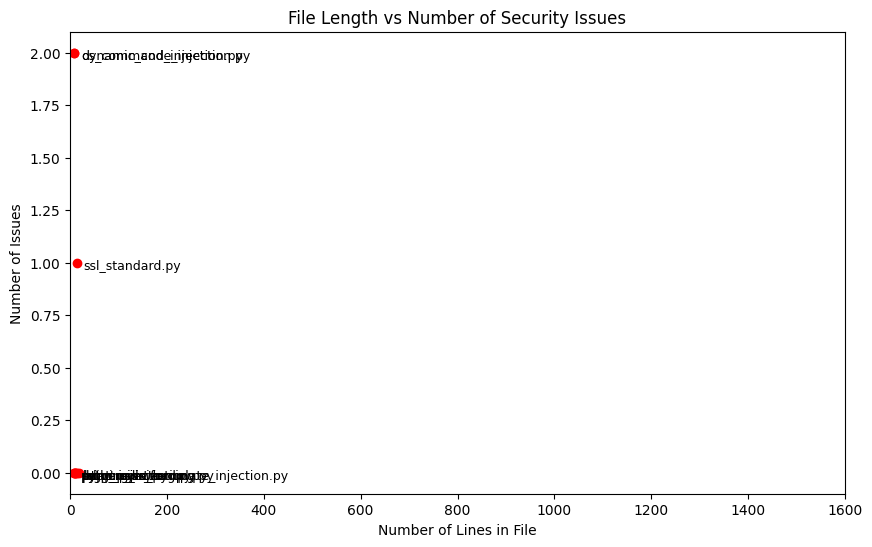

In [ ]:

import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


security_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/security/"


security_files = ['os_command_injection.py', 'http_redir_forging.py', 'logging_injection.py',
                  'dynamic_code_injection.py', 'serverside_template_injection.py', 'ldap_injection.py',
                  'ssl_standard.py', 'python_jwt.py', 'print_password.py', 'pyjwt.py']


def analyze_security_code(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()

    issues = []
    score = 100


    unsafe_funcs = ['eval', 'exec', 'os.system', 'subprocess.Popen']
    for uf in unsafe_funcs:
        if uf in code:
            issues.append(f"Unsafe function used: {uf}")
            score -= 5

    if re.search(r'password\s*=\s*["\'].*["\']', code, re.IGNORECASE):
        issues.append("Hardcoded password detected")
        score -= 5
    if re.search(r'token\s*=\s*["\'].*["\']', code, re.IGNORECASE):
        issues.append("Hardcoded token detected")
        score -= 5

    if "_create_unverified_context" in code:
        issues.append("SSL/TLS verification disabled")
        score -= 5


    if re.search(r'logger\.info\(.*%.*\)', code):
        issues.append("Potential Logging Injection")
        score -= 3


    if "input(" in code:
        issues.append("User input without validation")
        score -= 3

    score = max(score, 0)
    return {"score": score, "issues": issues}

results = {}
for f in security_files:
    path = os.path.join(security_path, f)
    results[f] = analyze_security_code(path)


for f, r in results.items():
    print(f"File: {f}")
    print(f"  Security Score: {r['score']}%")
    if r['issues']:
        for issue in r['issues']:
            print(f"  - {issue}")
    else:
        print("  No major issues detected.")
    print("-"*50)


all_scores = [r["score"] for r in results.values()]
overall_score = sum(all_scores) / len(all_scores)

recommendations = [
    "Avoid using unsafe functions (eval, exec, os.system, subprocess.Popen) without checks",
    "Do not hardcode passwords or tokens in code",
    "Ensure SSL/TLS verification is enabled",
    "Sanitize user input before logging",
    "Validate all user inputs"
]

print(f"\nOverall Security Code Score: {overall_score:.2f}%")
print("Recommended Improvements:")
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")


file_names = list(results.keys())
scores = [r["score"] for r in results.values()]

sorted_idx = np.argsort(scores)
file_names_sorted = [file_names[i] for i in sorted_idx]
scores_sorted = [scores[i] for i in sorted_idx]

colors = []
for s in scores_sorted:
    if s >= 85:
        colors.append("green")
    elif s >= 70:
        colors.append("orange")
    else:
        colors.append("red")

plt.figure(figsize=(12,8))
bars = plt.barh(file_names_sorted, scores_sorted, color=colors)
plt.xlabel("Security Score (%)")
plt.title("Security Python Code - Code Quality Distribution")
plt.xlim(0,100)
for bar, score in zip(bars, scores_sorted):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{score}%', va='center', fontsize=10)
plt.tight_layout()
plt.show()


all_issue_types = ["Unsafe Functions", "Hardcoded Credentials", "SSL/TLS Issues",
                   "Logging Injection", "Input Validation Missing"]


heatmap_data = pd.DataFrame(0, index=security_files, columns=all_issue_types)


for f in security_files:
    r = results[f]
    for issue in r["issues"]:
        if "Unsafe function" in issue:
            heatmap_data.loc[f, "Unsafe Functions"] += 1
        elif "Hardcoded password" in issue or "Hardcoded token" in issue:
            heatmap_data.loc[f, "Hardcoded Credentials"] += 1
        elif "SSL/TLS" in issue:
            heatmap_data.loc[f, "SSL/TLS Issues"] += 1
        elif "Logging Injection" in issue:
            heatmap_data.loc[f, "Logging Injection"] += 1
        elif "User input" in issue:
            heatmap_data.loc[f, "Input Validation Missing"] += 1

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5)
plt.title("Security Issues Heatmap (All Files)")
plt.ylabel("Files")
plt.xlabel("Issue Type")
plt.show()


file_lengths = []
num_issues = []

for f in file_names:
    with open(os.path.join(security_path, f), "r", encoding="utf-8") as file:
        lines = file.readlines()
        file_lengths.append(len(lines))
    num_issues.append(len(results[f]["issues"]))

plt.figure(figsize=(10,6))
plt.scatter(file_lengths, num_issues, color='red')
for i, txt in enumerate(file_names):
    plt.annotate(txt, (file_lengths[i], num_issues[i]), xytext=(5,-5), textcoords='offset points', fontsize=9)
plt.xlabel("Number of Lines in File")
plt.ylabel("Number of Issues")
plt.title("File Length vs Number of Security Issues")
plt.xlim(0, 1600)
plt.show()


In [ ]:
!pip install python-docx

from docx import Document
from docx.shared import Inches
import pandas as pd
import os


def run_code_quality_on_folder(folder_path, analysis_func=analyze_code_quality):
    results = {}
    for f in os.listdir(folder_path):
        if f.endswith(".py"):
            file_path = os.path.join(folder_path, f)
            results[f] = analysis_func(file_path)

    all_scores = [r["score"] for r in results.values()]
    avg_score = sum(all_scores) / len(all_scores)
    total_issues = sum(len(r["issues"]) for r in results.values())
    num_files = len(results)

    return {
        "results": results,
        "avg_score": avg_score,
        "total_issues": total_issues,
        "num_files": num_files
    }


folders = {
    "Open Source": ("open_source/", "ai_generated/open_source/"),
    "Code Smells": ("code_smells/", "ai_generated/code_smells/"),
    "Algorithms": ("algorithms/", "ai_generated/algorithms/"),
    "Security": ("security/", "ai_generated/security/")
}


table_rows = []

for category, (human_sub, ai_sub) in folders.items():
    human_path = base_path + human_sub
    ai_path = base_path + ai_sub


    if category == "Security":
        analysis_func = analyze_security_code
    elif category == "Algorithms":
        analysis_func = analyze_algorithm_code
    else:
        analysis_func = analyze_code_quality

    human_results = run_code_quality_on_folder(human_path, analysis_func)
    ai_results = run_code_quality_on_folder(ai_path, analysis_func)

    table_rows.append({
        "Category": category,
        "Type": "Human",
        "Avg Score (%)": round(human_results['avg_score'], 2),
        "Files": human_results['num_files'],
        "Total Issues": human_results['total_issues']
    })
    table_rows.append({
        "Category": category,
        "Type": "AI-generated",
        "Avg Score (%)": round(ai_results['avg_score'], 2),
        "Files": ai_results['num_files'],
        "Total Issues": ai_results['total_issues']
    })


df_results = pd.DataFrame(table_rows)
df_results = df_results[["Category", "Type", "Avg Score (%)", "Files", "Total Issues"]]


doc = Document()
doc.add_heading("Code Quality Comparison", level=1)


table = doc.add_table(rows=1, cols=len(df_results.columns))
table.style = 'Table Grid'

hdr_cells = table.rows[0].cells
for i, col in enumerate(df_results.columns):
    hdr_cells[i].text = col


for index, row in df_results.iterrows():
    row_cells = table.add_row().cells
    for i, col in enumerate(df_results.columns):
        row_cells[i].text = str(row[col])


output_file = "code_quality_comparison.docx"
doc.save(output_file)


print("=== Code Quality Comparison Table ===")
print(df_results.to_string(index=False))
print(f"\n✅ Table saved to {output_file}")

=== Code Quality Comparison Table ===
   Category         Type  Avg Score (%)  Files  Total Issues
Open Source        Human           76.4     10            85
Open Source AI-generated           90.2     10            17
Code Smells        Human           85.5     10            19
Code Smells AI-generated           90.0     10            10
 Algorithms        Human           98.6     10             3
 Algorithms AI-generated           89.2     10            14
   Security        Human           97.5     10             5
   Security AI-generated           97.3     10             7

✅ Table saved to code_quality_comparison.docx


<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


In [ ]:

for category, (human_sub, ai_sub) in folders.items():
    print(f"=== {category} Code Quality Comparison ===")

    human_path = base_path + human_sub
    ai_path = base_path + ai_sub

    if category == "Security":
        analysis_func = analyze_security_code
    elif category == "Algorithms":
        analysis_func = analyze_algorithm_code
    else:
        analysis_func = analyze_code_quality

    human_results = run_code_quality_on_folder(human_path, analysis_func)
    ai_results = run_code_quality_on_folder(ai_path, analysis_func)

    print(f"Human {category}:")
    print(f"  Avg Score: {human_results['avg_score']:.2f}%")
    print(f"  Files: {human_results['num_files']}")
    print(f"  Total Issues: {human_results['total_issues']}")

    print(f"\nAI-generated {category}:")
    print(f"  Avg Score: {ai_results['avg_score']:.2f}%")
    print(f"  Files: {ai_results['num_files']}")
    print(f"  Total Issues: {ai_results['total_issues']}")
    print("-"*60)

<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


=== Open Source Code Quality Comparison ===
Human Open Source:
  Avg Score: 76.40%
  Files: 10
  Total Issues: 85

AI-generated Open Source:
  Avg Score: 90.20%
  Files: 10
  Total Issues: 17
------------------------------------------------------------
=== Code Smells Code Quality Comparison ===
Human Code Smells:
  Avg Score: 85.50%
  Files: 10
  Total Issues: 19

AI-generated Code Smells:
  Avg Score: 90.00%
  Files: 10
  Total Issues: 10
------------------------------------------------------------
=== Algorithms Code Quality Comparison ===
Human Algorithms:
  Avg Score: 98.60%
  Files: 10
  Total Issues: 3

AI-generated Algorithms:
  Avg Score: 89.20%
  Files: 10
  Total Issues: 14
------------------------------------------------------------
=== Security Code Quality Comparison ===
Human Security:
  Avg Score: 97.50%
  Files: 10
  Total Issues: 5

AI-generated Security:
  Avg Score: 97.30%
  Files: 10
  Total Issues: 7
------------------------------------------------------------


<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


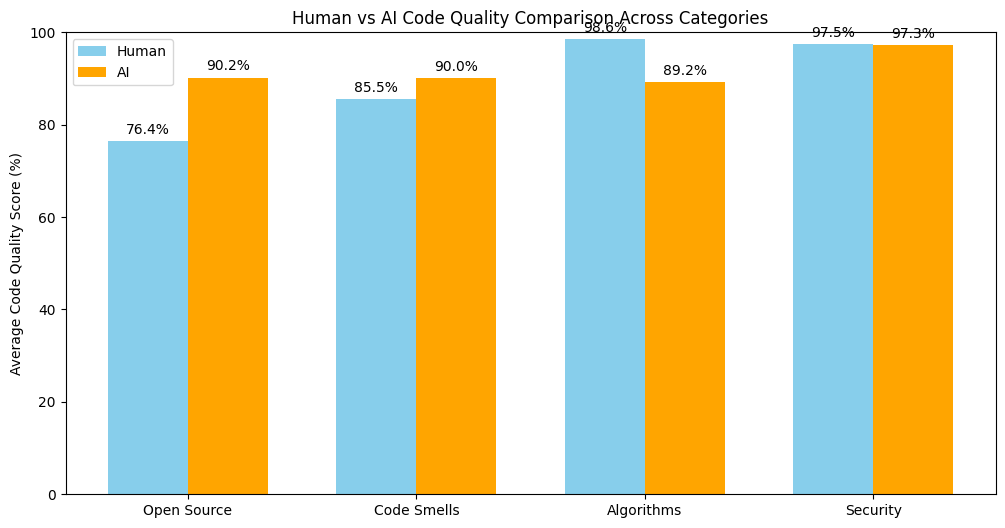

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


categories = ["Open Source", "Code Smells", "Algorithms", "Security"]
human_scores = []
ai_scores = []

for category, (human_sub, ai_sub) in folders.items():
    human_path = base_path + human_sub
    ai_path = base_path + ai_sub

    if category == "Security":
        analysis_func = analyze_security_code
    elif category == "Algorithms":
        analysis_func = analyze_algorithm_code
    else:
        analysis_func = analyze_code_quality

    human_results = run_code_quality_on_folder(human_path, analysis_func)
    ai_results = run_code_quality_on_folder(ai_path, analysis_func)

    human_scores.append(human_results['avg_score'])
    ai_scores.append(ai_results['avg_score'])


x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
bars1 = ax.bar(x - width/2, human_scores, width, label='Human', color='skyblue')
bars2 = ax.bar(x + width/2, ai_scores, width, label='AI', color='orange')


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)


ax.set_ylabel('Average Code Quality Score (%)')
ax.set_title('Human vs AI Code Quality Comparison Across Categories')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend()
plt.show()




=== Open Source AI Code Quality Analysis ===
Files detected (10): ['colorama_init__chatgpt.py', 'schedule_core__copilot.py', 'pydantic_utils__gemini.py', 'typer_main__gemini.py', 'fire_core__gemini.py', 'rich_text__copilot.py', 'requests_utils__chatgpt.py', 'click_utils__chatgpt.py', 'bs4_element__copilot.py', 'flask_helpers__chatgpt.py']
File: colorama_init__chatgpt.py - Score: 90% - Issues: 1
File: schedule_core__copilot.py - Score: 94% - Issues: 3
File: pydantic_utils__gemini.py - Score: 90% - Issues: 1
File: typer_main__gemini.py - Score: 88% - Issues: 2
File: fire_core__gemini.py - Score: 88% - Issues: 2
File: rich_text__copilot.py - Score: 94% - Issues: 3
File: requests_utils__chatgpt.py - Score: 90% - Issues: 1
File: click_utils__chatgpt.py - Score: 90% - Issues: 1
File: bs4_element__copilot.py - Score: 90% - Issues: 1
File: flask_helpers__chatgpt.py - Score: 88% - Issues: 2


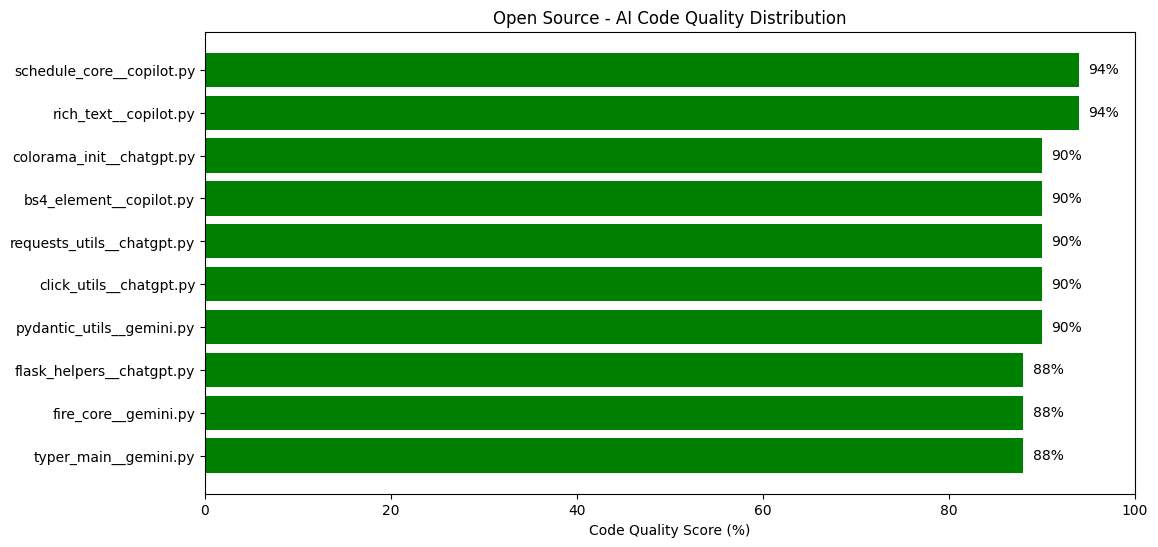

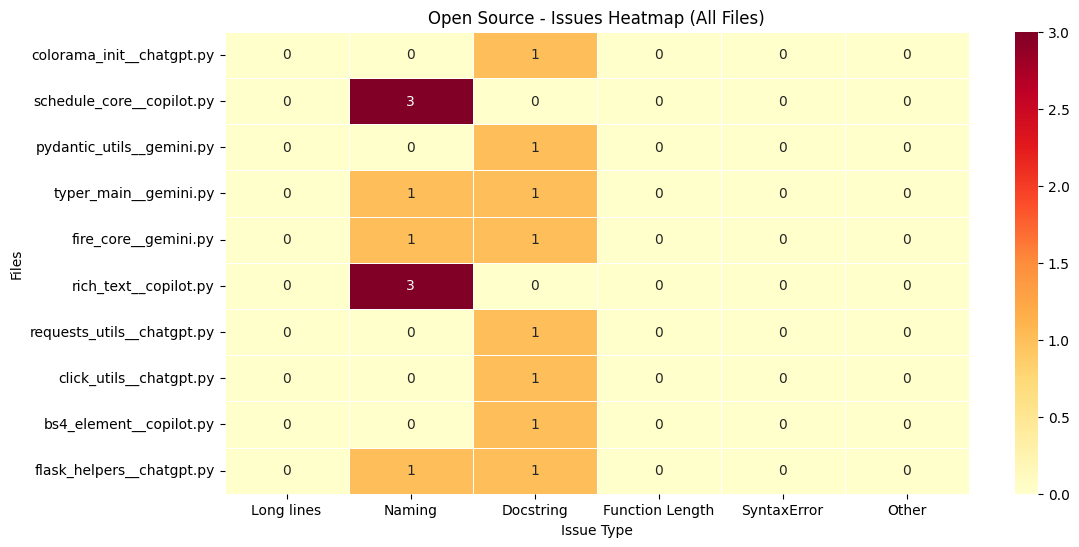

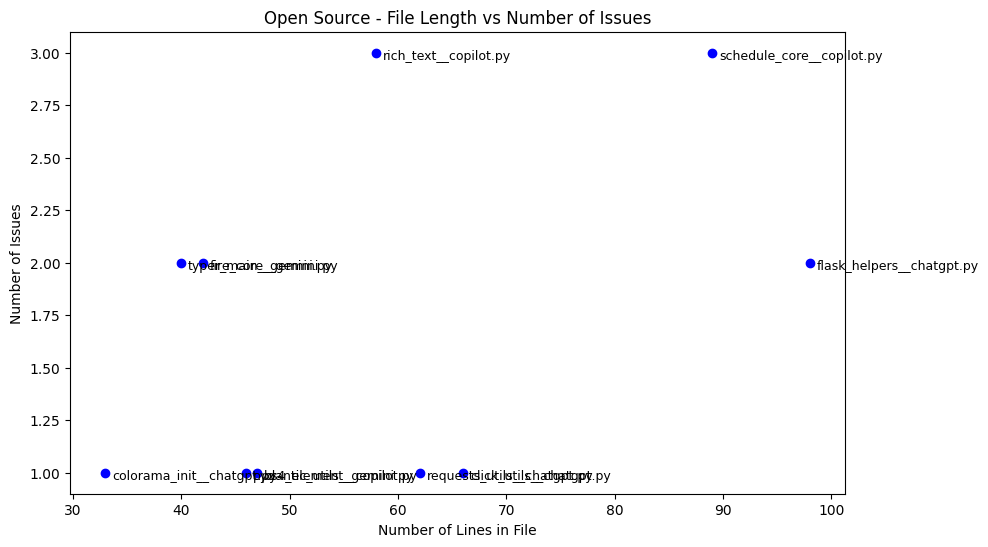

Overall Score for Open Source: 90.20%


=== Code Smells AI Code Quality Analysis ===
Files detected (10): ['nslookup_check__copilot.py', 'fileinfo__chatgpt.py', 'batch_file_rename__chatgpt.py', 'osinfo__copilot.py', 'logs_1__gemini.py', 'bubble_sort __copilot.py', 'folder_size__chatgpt.py', 'move_files_over_x_days__gemini.py', 'create_dir_if_not_there__chatgpt.py', 'logs_2__gemini.py']
File: nslookup_check__copilot.py - Score: 90% - Issues: 1
File: fileinfo__chatgpt.py - Score: 90% - Issues: 1
File: batch_file_rename__chatgpt.py - Score: 90% - Issues: 1
File: osinfo__copilot.py - Score: 90% - Issues: 1
File: logs_1__gemini.py - Score: 90% - Issues: 1
File: bubble_sort __copilot.py - Score: 90% - Issues: 1
File: folder_size__chatgpt.py - Score: 90% - Issues: 1
File: move_files_over_x_days__gemini.py - Score: 90% - Issues: 1
File: create_dir_if_not_there__chatgpt.py - Score: 90% - Issues: 1
File: logs_2__gemini.py - Score: 90% - Issues: 1


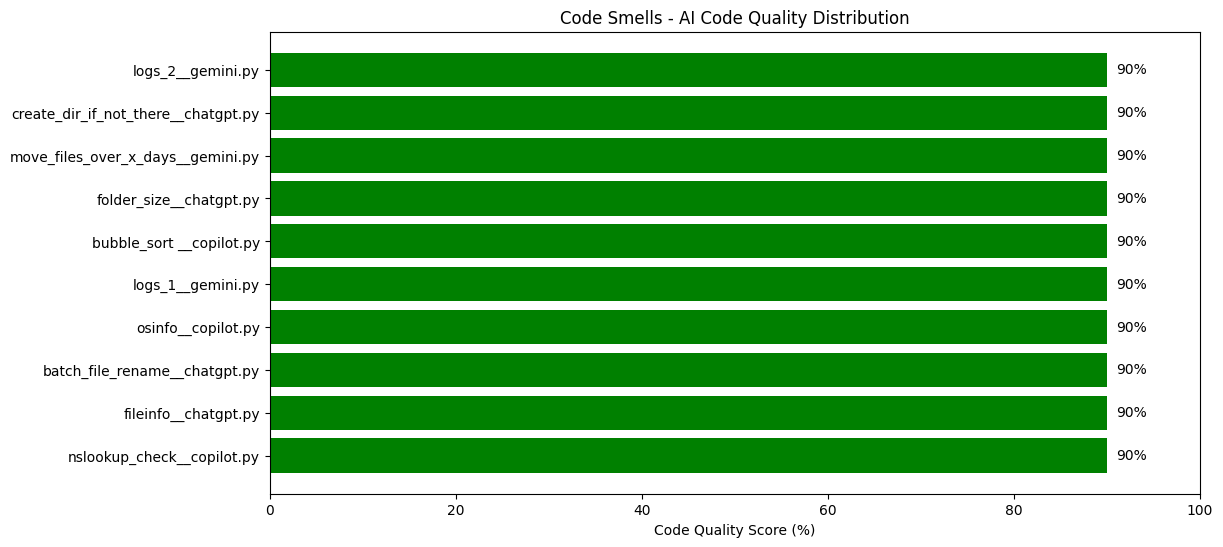

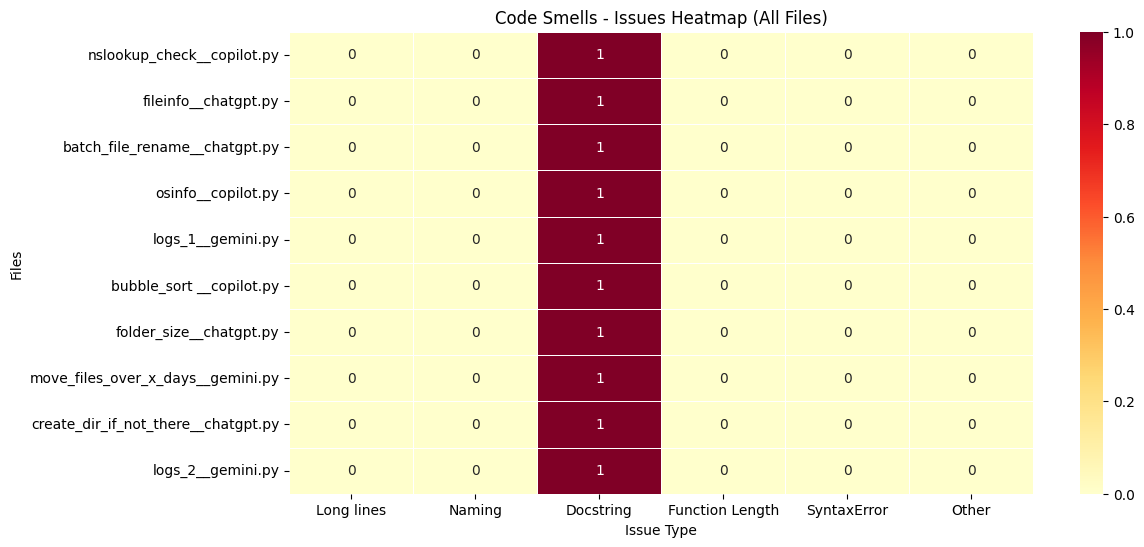

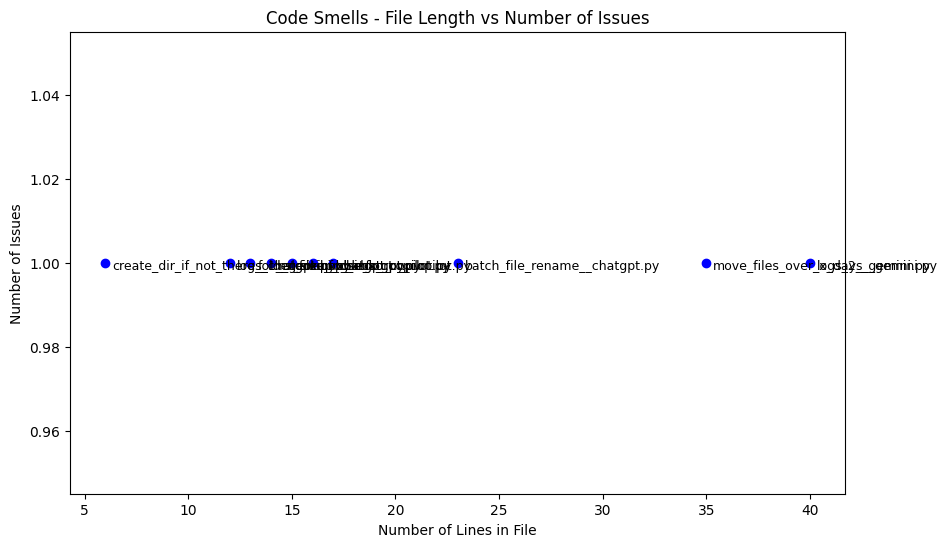

Overall Score for Code Smells: 90.00%


=== Algorithms AI Code Quality Analysis ===
Files detected (10): ['insertion_sort__chatgpt.py', 'gnome_sort__copilot.py', 'sentinel_linear_search__chatgpt.py', 'heap_sort__gemini.py', 'selection_sort__gemini.py', 'merge_sort__chatgpt.py', 'bucket_sort__copilot.py', 'shell_sort__copilot.py', 'binary_search__chatgpt.py', 'quick_sort__gemini.py']
File: insertion_sort__chatgpt.py - Score: 90% - Issues: 1
File: gnome_sort__copilot.py - Score: 90% - Issues: 1
File: sentinel_linear_search__chatgpt.py - Score: 90% - Issues: 1
File: heap_sort__gemini.py - Score: 88% - Issues: 2
File: selection_sort__gemini.py - Score: 90% - Issues: 1
File: merge_sort__chatgpt.py - Score: 88% - Issues: 2
File: bucket_sort__copilot.py - Score: 90% - Issues: 1
File: shell_sort__copilot.py - Score: 90% - Issues: 1
File: binary_search__chatgpt.py - Score: 90% - Issues: 1
File: quick_sort__gemini.py - Score: 86% - Issues: 3


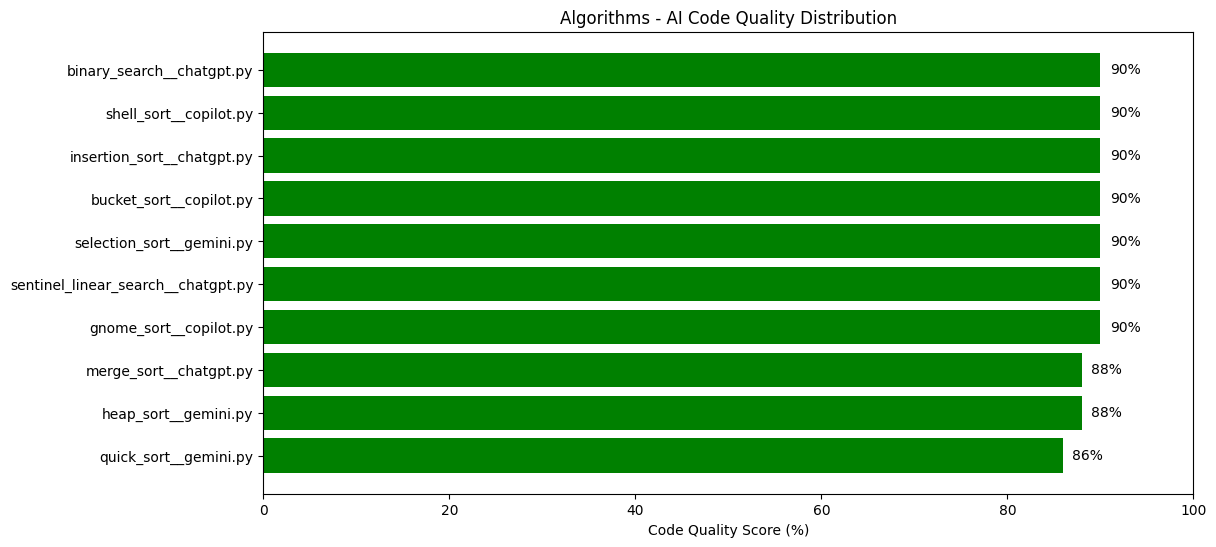

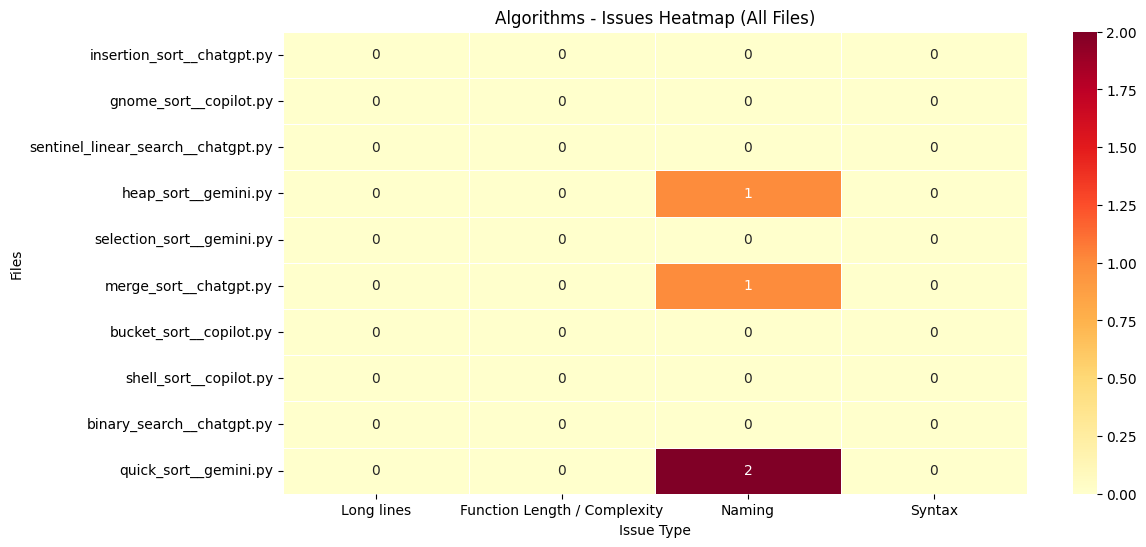

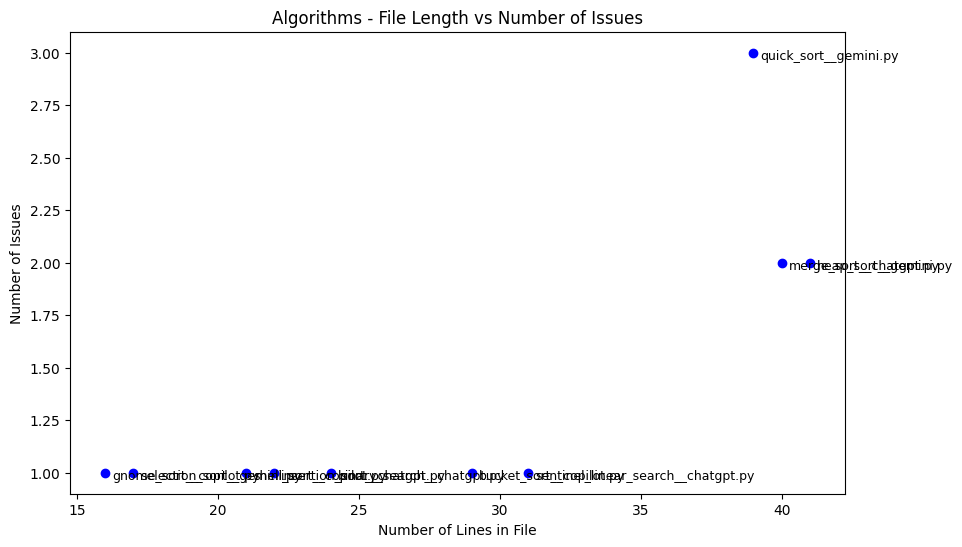

Overall Score for Algorithms: 89.20%


=== Security AI Code Quality Analysis ===
Files detected (10): ['dynamic_code_injection__chatgpt.py', 'serverside_template_injection__chatgpt.py', 'os_command_injection__chatgpt.py', 'pyjwt_misuse__copilot.py', 'print_password__gemini.py', 'ldap_injection__chatgpt.py', 'ssl_standard_misconfig__copilot.py', 'python_jwt_misuse__copilot.py', 'http_redir_forging__gemini.py', 'logging_injection__gemini.py']
File: dynamic_code_injection__chatgpt.py - Score: 95% - Issues: 1
File: serverside_template_injection__chatgpt.py - Score: 97% - Issues: 1
File: os_command_injection__chatgpt.py - Score: 92% - Issues: 2
File: pyjwt_misuse__copilot.py - Score: 95% - Issues: 1
File: print_password__gemini.py - Score: 100% - Issues: 0
File: ldap_injection__chatgpt.py - Score: 97% - Issues: 1
File: ssl_standard_misconfig__copilot.py - Score: 100% - Issues: 0
File: python_jwt_misuse__copilot.py - Score: 100% - Issues: 0
File: http_redir_forging__gemini.py - Score: 100% -

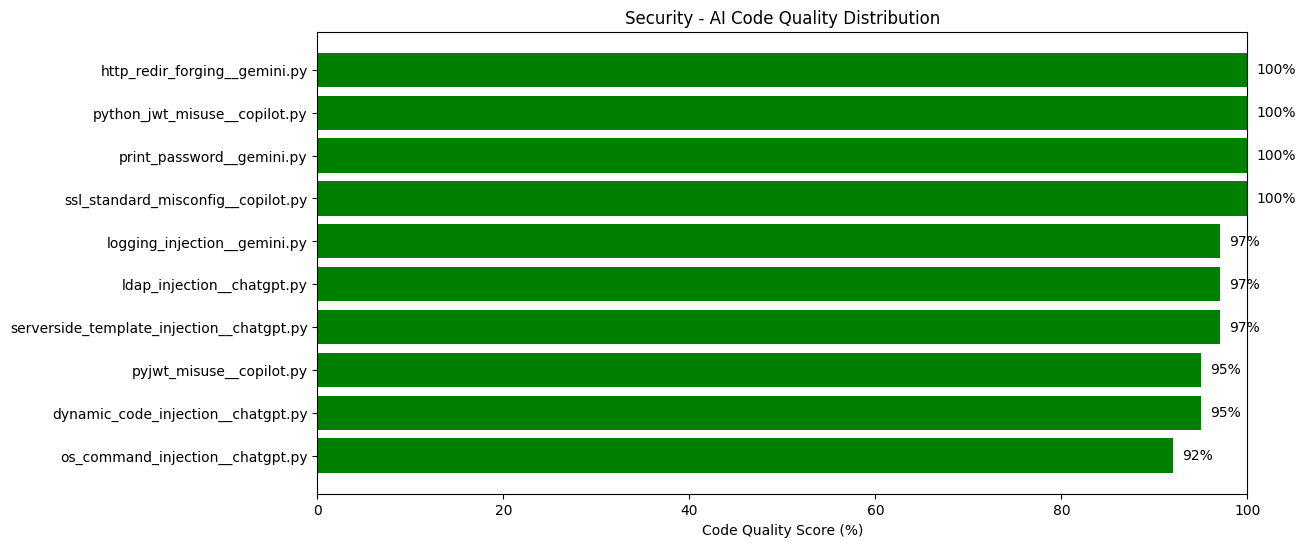

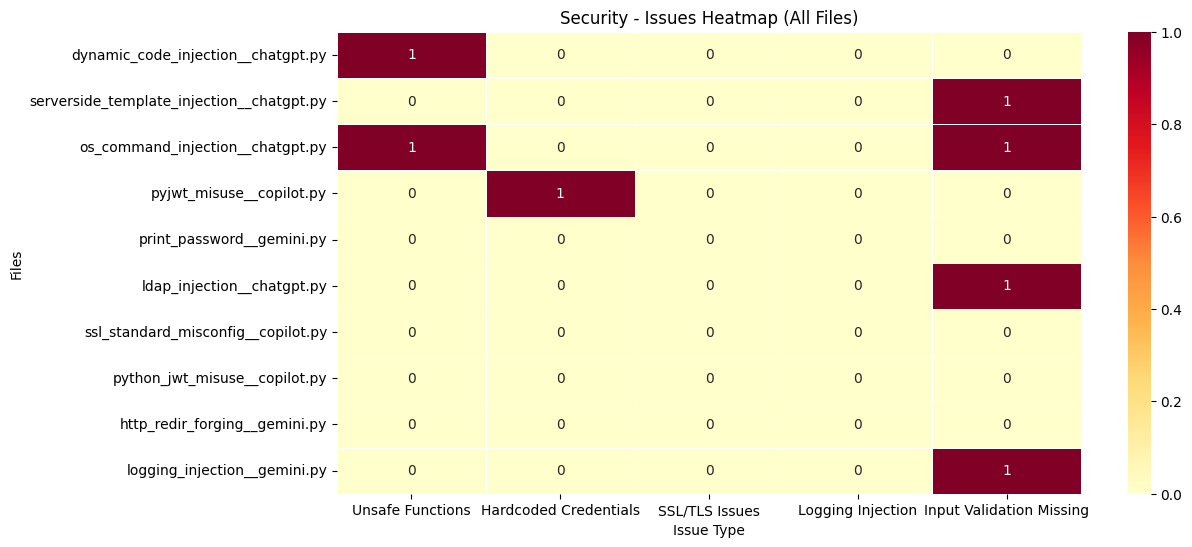

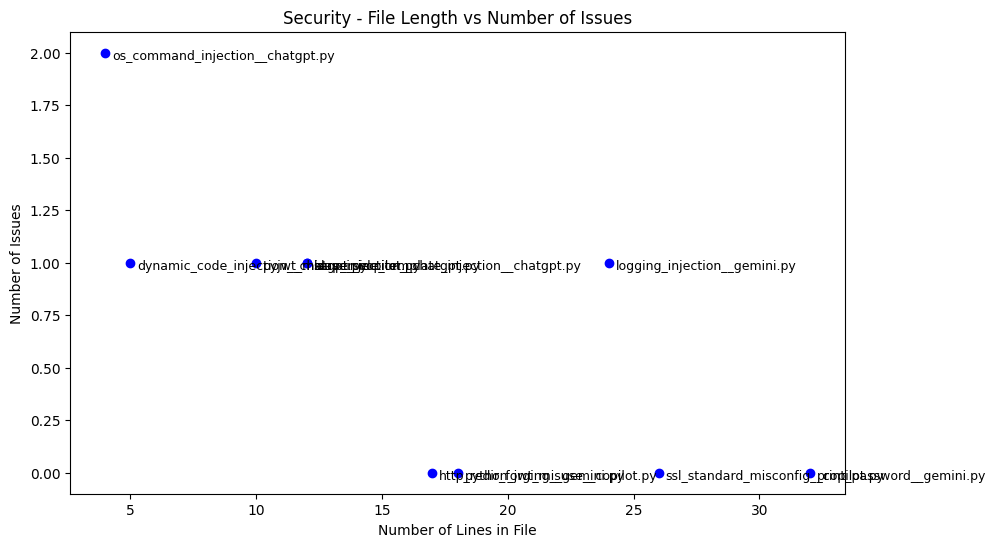

Overall Score for Security: 97.30%


In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


base_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/"

folders_ai = {
    "Open Source": base_path + "ai_generated/open_source/",
    "Code Smells": base_path + "ai_generated/code_smells/",
    "Algorithms": base_path + "ai_generated/algorithms/",
    "Security": base_path + "ai_generated/security/"
}


def analyze_code_quality(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()
    issues = []
    score = 100
    long_lines = [i+1 for i, line in enumerate(code.splitlines()) if len(line) > 120]
    if long_lines:
        issues.append(f"Long lines at: {long_lines}")
        score -= min(5*len(long_lines), 20)

    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError")
        score -= 30
        return {"score": max(score,0), "issues": issues}

    if not ast.get_docstring(tree):
        issues.append("Missing module docstring")
        score -= 10

    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if len(node.body) > 20:
            issues.append(f"Function '{node.name}' too long ({len(node.body)} lines)")
            score -= 5
        if not node.name.islower() or "_" not in node.name:
            issues.append(f"Function '{node.name}' naming not snake_case")
            score -= 2

    for node in [n for n in ast.walk(tree) if isinstance(n, ast.ClassDef)]:
        if not node.name[0].isupper() or "_" in node.name:
            issues.append(f"Class '{node.name}' naming not CamelCase")
            score -= 2

    score = max(score, 0)
    return {"score": score, "issues": issues}

def analyze_algorithm_code(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()
    issues = []
    score = 100
    long_lines = [i+1 for i, line in enumerate(code.splitlines()) if len(line) > 120]
    if long_lines:
        issues.append(f"Long lines at: {long_lines}")
        score -= min(5*len(long_lines), 20)

    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError")
        score -= 30
        return {"score": max(score,0), "issues": issues}

    if not ast.get_docstring(tree):
        issues.append("Missing module docstring")
        score -= 10

    for node in [n for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]:
        if len(node.body) > 20:
            issues.append(f"Function '{node.name}' too long ({len(node.body)} lines)")
            score -= 5
        if not node.name.islower() or "_" not in node.name:
            issues.append(f"Function '{node.name}' naming not snake_case")
            score -= 2

    score = max(score, 0)
    return {"score": score, "issues": issues}

def analyze_security_code(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()
    issues = []
    score = 100
    unsafe_funcs = ['eval', 'exec', 'os.system', 'subprocess.Popen']
    for uf in unsafe_funcs:
        if uf in code:
            issues.append(f"Unsafe function used: {uf}")
            score -= 5
    if re.search(r'password\s*=\s*["\\\'].*["\\\']', code, re.IGNORECASE):
        issues.append("Hardcoded password detected")
        score -= 5
    if re.search(r'token\s*=\s*["\\\'].*["\\\']', code, re.IGNORECASE):
        issues.append("Hardcoded token detected")
        score -= 5
    if "_create_unverified_context" in code:
        issues.append("SSL/TLS verification disabled")
        score -= 5
    if re.search(r'logger\.info\(.*%.*\)', code):
        issues.append("Potential Logging Injection")
        score -= 3
    if "input(" in code:
        issues.append("User input without validation")
        score -= 3
    score = max(score, 0)
    return {"score": score, "issues": issues}


for category, path in folders_ai.items():
    print(f"\n\n=== {category} AI Code Quality Analysis ===")

    if not os.path.exists(path):
        print(f"Path not found: {path}")
        continue

    files = [f for f in os.listdir(path) if f.endswith(".py")]
    if not files:
        print(f"No Python files found in {path}")
        continue
    print(f"Files detected ({len(files)}): {files}")


    if category == "Algorithms":
        analysis_func = analyze_algorithm_code
    elif category == "Security":
        analysis_func = analyze_security_code
    else:
        analysis_func = analyze_code_quality


    results = {f: analysis_func(os.path.join(path,f)) for f in files}


    for f, r in results.items():
        print(f"File: {f} - Score: {r['score']}% - Issues: {len(r['issues'])}")


    file_names = list(results.keys())
    scores = [r["score"] for r in results.values()]
    sorted_idx = np.argsort(scores)
    file_names_sorted = [file_names[i] for i in sorted_idx]
    scores_sorted = [scores[i] for i in sorted_idx]
    colors = ['green' if s>=85 else 'orange' if s>=70 else 'red' for s in scores_sorted]
    plt.figure(figsize=(12,6))
    bars = plt.barh(file_names_sorted, scores_sorted, color=colors)
    plt.xlabel("Code Quality Score (%)")
    plt.title(f"{category} - AI Code Quality Distribution")
    plt.xlim(0,100)
    for bar, score in zip(bars, scores_sorted):
        plt.text(bar.get_width()+1, bar.get_y()+bar.get_height()/2, f'{score}%', va='center', fontsize=10)
    plt.show()

    if category in ["Open Source", "Code Smells"]:
        issue_types_set = ["Long lines", "Naming", "Docstring", "Function Length", "SyntaxError", "Other"]
    elif category == "Algorithms":
        issue_types_set = ["Long lines", "Function Length / Complexity", "Naming", "Syntax"]
    else:  # Security
        issue_types_set = ["Unsafe Functions", "Hardcoded Credentials", "SSL/TLS Issues",
                           "Logging Injection", "Input Validation Missing"]


    heatmap_df = pd.DataFrame(0, index=file_names, columns=issue_types_set)

    for f, r in results.items():
        for issue in r["issues"]:
            issue_lower = issue.lower()
            if "long lines" in issue_lower:
                col = "Long lines" if "Long lines" in issue_types_set else issue_types_set[0]
            elif "too long" in issue_lower or "function length" in issue_lower:
                col = "Function Length" if "Function Length" in issue_types_set else issue_types_set[0]
                if category == "Algorithms":
                    col = "Function Length / Complexity"
            elif "naming not" in issue_lower:
                col = "Naming"
            elif "docstring" in issue_lower:
                col = "Docstring"
            elif "syntaxerror" in issue_lower or "syntax error" in issue_lower:
                col = "SyntaxError" if "SyntaxError" in issue_types_set else issue_types_set[0]
                if category == "Algorithms":
                    col = "Syntax"
            elif "unsafe function" in issue_lower:
                col = "Unsafe Functions"
            elif "hardcoded password" in issue_lower or "hardcoded token" in issue_lower:
                col = "Hardcoded Credentials"
            elif "ssl/tls" in issue_lower:
                col = "SSL/TLS Issues"
            elif "logging injection" in issue_lower:
                col = "Logging Injection"
            elif "user input" in issue_lower:
                col = "Input Validation Missing"
            else:
                col = "Other"

            if col in heatmap_df.columns:
                heatmap_df.loc[f, col] += 1


    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlOrRd", linewidths=.5)
    plt.title(f"{category} - Issues Heatmap (All Files)")
    plt.ylabel("Files")
    plt.xlabel("Issue Type")
    plt.show()


    file_lengths = [len(open(os.path.join(path,f), "r", encoding="utf-8").readlines()) for f in file_names]
    num_issues = [len(results[f]["issues"]) for f in file_names]
    plt.figure(figsize=(10,6))
    plt.scatter(file_lengths, num_issues, color='blue')
    for i, txt in enumerate(file_names):
        plt.annotate(txt, (file_lengths[i], num_issues[i]), xytext=(5,-5), textcoords='offset points', fontsize=9)
    plt.xlabel("Number of Lines in File")
    plt.ylabel("Number of Issues")
    plt.title(f"{category} - File Length vs Number of Issues")
    plt.show()


    overall_score = np.mean([r["score"] for r in results.values()])
    print(f"Overall Score for {category}: {overall_score:.2f}%")


In [ ]:
import os
import ast
import pandas as pd
import numpy as np


base_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/"

folders = {
    "Human_Open_Source": base_path + "open_source/",
    "Human_Code_Smells": base_path + "code_smells/",
    "Human_Algorithms": base_path + "algorithms/",
    "Human_Security": base_path + "security/",
    "AI_Open_Source": base_path + "ai_generated/open_source/",
    "AI_Code_Smells": base_path + "ai_generated/code_smells/",
    "AI_Algorithms": base_path + "ai_generated/algorithms/",
    "AI_Security": base_path + "ai_generated/security/"
}


def analyze_structural_complexity(file_path):
    metrics = {
        "num_functions": 0,
        "avg_function_length": 0,
        "max_function_length": 0,
        "loops_count": 0,
        "has_recursion": 0,
        "total_lines": 0
    }

    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
            metrics["total_lines"] = len(code.splitlines())
    except:
        return metrics

    try:
        tree = ast.parse(code)
    except:
        return metrics

    function_lengths = []
    function_names = []

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            metrics["num_functions"] += 1
            function_names.append(node.name)
            function_lengths.append(len(node.body))

        if isinstance(node, (ast.For, ast.While)):
            metrics["loops_count"] += 1

    for node in ast.walk(tree):
        if isinstance(node, ast.Call) and isinstance(node.func, ast.Name):
            if node.func.id in function_names:
                metrics["has_recursion"] = 1

    if function_lengths:
        metrics["avg_function_length"] = round(np.mean(function_lengths), 2)
        metrics["max_function_length"] = max(function_lengths)

    return metrics


all_results = []

for category, path in folders.items():
    if not os.path.exists(path):
        continue

    files = [f for f in os.listdir(path) if f.endswith(".py")]

    for f in files:
        file_path = os.path.join(path, f)
        metrics = analyze_structural_complexity(file_path)

        metrics_row = {
            "Category": category,
            "File": f,
            **metrics
        }
        all_results.append(metrics_row)


structural_df = pd.DataFrame(all_results)

structural_df


<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


,Category,File,num_functions,avg_function_length,max_function_length,loops_count,has_recursion,total_lines
0,Human_Open_Source,rich_text.py,29,4.03,11,0,1,661
1,Human_Open_Source,requests_utils.py,2,3.00,3,0,0,50
2,Human_Open_Source,click_utils.py,1,1.00,1,0,0,36
3,Human_Open_Source,colorama_init.py,8,4.75,11,0,1,117
4,Human_Open_Source,bs4_element.py,0,0.00,0,0,0,1611
5,Human_Open_Source,flask_helpers.py,7,4.29,10,4,1,179
6,Human_Open_Source,fire_core.py,30,2.53,8,0,0,228
7,Human_Open_Source,pydantic_utils.py,32,2.41,10,8,1,446
8,Human_Open_Source,typer_main.py,11,2.64,6,1,1,190
9,Human_Open_Source,schedule_core.py,57,3.56,18,4,1,945


In [ ]:
import os
import ast
import re
import pandas as pd
import numpy as np



base_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/"

folders = {
    "Human_Open_Source": base_path + "open_source/",
    "Human_Code_Smells": base_path + "code_smells/",
    "Human_Algorithms": base_path + "algorithms/",
    "Human_Security": base_path + "security/",
    "AI_Open_Source": base_path + "ai_generated/open_source/",
    "AI_Code_Smells": base_path + "ai_generated/code_smells/",
    "AI_Algorithms": base_path + "ai_generated/algorithms/",
    "AI_Security": base_path + "ai_generated/security/"
}


def analyze_file_structure(file_path):
    """تحليل عدد الدوال وطول الدوال والحلقات والrecursion وعدد الأسطر"""
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {
            "num_functions": 0,
            "avg_function_length": 0,
            "max_function_length": 0,
            "loops_count": 0,
            "has_recursion": 0,
            "total_lines": 0
        }

    total_lines = len(code.splitlines())
    try:
        tree = ast.parse(code)
    except:
        return {
            "num_functions": 0,
            "avg_function_length": 0,
            "max_function_length": 0,
            "loops_count": 0,
            "has_recursion": 0,
            "total_lines": total_lines
        }

    func_lengths = []
    loops_count = 0
    has_recursion = 0

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            func_lengths.append(len(node.body))

            for n in ast.walk(node):
                if isinstance(n, (ast.For, ast.While)):
                    loops_count += 1

                if isinstance(n, ast.Call) and isinstance(n.func, ast.Name):
                    if n.func.id == node.name:
                        has_recursion = 1
    if func_lengths:
        avg_func_length = sum(func_lengths)/len(func_lengths)
        max_func_length = max(func_lengths)
    else:
        avg_func_length = 0
        max_func_length = 0

    return {
        "num_functions": len(func_lengths),
        "avg_function_length": round(avg_func_length,2),
        "max_function_length": max_func_length,
        "loops_count": loops_count,
        "has_recursion": has_recursion,
        "total_lines": total_lines
    }

def analyze_code_quality(file_path):
    """تحليل مشاكل الكود"""
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {"score": 0, "num_issues": 0, "issues": []}

    score = 100
    issues = []

    long_lines = [i+1 for i, l in enumerate(code.splitlines()) if len(l)>120]
    if long_lines:
        issues.append(f"Long lines at {long_lines}")
        score -= min(len(long_lines)*5, 20)


    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError: Possibly Python 2 code, cannot analyze automatically")
        score -= 30
        return {"score": max(score,0), "num_issues": len(issues), "issues": issues}


    if not ast.get_docstring(tree):
        issues.append("Missing module docstring")
        score -= 10

    return {"score": max(score,0), "num_issues": len(issues), "issues": issues}


def analyze_security(file_path):
    """تحليل مشاكل الأمان"""
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {"security_issues": 0, "issues": []}

    issues = []
    unsafe_funcs = ["eval","exec","os.system","subprocess.Popen"]
    for uf in unsafe_funcs:
        if uf in code:
            issues.append(f"Unsafe function {uf}")

    if re.search(r'password\s*=\s*["\'"].*?["\'"]', code, re.IGNORECASE): # Corrected regex
        issues.append("Hardcoded password")
    if re.search(r'token\s*=\s*["\'"].*?["\'"]', code, re.IGNORECASE): # Corrected regex
        issues.append("Hardcoded token")

    return {"security_issues": len(issues), "issues": issues}


all_results = []

for category, path in folders.items():
    if not os.path.exists(path):
        continue

    files = [f for f in os.listdir(path) if f.endswith(".py")]
    for f in files:
        full_path = os.path.join(path, f)
        struct = analyze_file_structure(full_path)
        code_metrics = analyze_code_quality(full_path)
        sec_metrics = analyze_security(full_path)

        all_results.append({
            "Category": category,
            "File": f,
            **struct,
            "code_score": code_metrics["score"],
            "num_code_issues": code_metrics["num_issues"],
            "security_issues": sec_metrics["security_issues"]
        })

df_results = pd.DataFrame(all_results)
df_results

<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'
<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'


,Category,File,num_functions,avg_function_length,max_function_length,loops_count,has_recursion,total_lines,code_score,num_code_issues,security_issues
0,Human_Open_Source,rich_text.py,29,4.03,11,0,0,661,95,1,0
1,Human_Open_Source,requests_utils.py,2,3.00,3,0,0,50,100,0,0
2,Human_Open_Source,click_utils.py,1,1.00,1,0,0,36,90,1,0
3,Human_Open_Source,colorama_init.py,8,4.75,11,0,0,117,90,1,0
4,Human_Open_Source,bs4_element.py,0,0.00,0,0,0,1611,70,1,0
5,Human_Open_Source,flask_helpers.py,7,4.29,10,4,0,179,90,1,0
6,Human_Open_Source,fire_core.py,30,2.53,8,0,0,228,100,0,0
7,Human_Open_Source,pydantic_utils.py,32,2.41,10,8,1,446,100,0,0
8,Human_Open_Source,typer_main.py,11,2.64,6,1,0,190,90,1,1
9,Human_Open_Source,schedule_core.py,57,3.56,18,4,0,945,95,1,1


Aggregated Comparison Table (Mean):
                   num_functions  avg_function_length  max_function_length  loops_count  has_recursion  total_lines  code_score  num_code_issues  security_issues
Category                                                                                                                                                         
AI_Algorithms                1.4                 4.90                  5.2          1.9            0.3         28.0        90.0              1.0              0.0
AI_Code_Smells               0.6                 2.20                  2.2          0.6            0.0         19.1        90.0              1.0              0.0
AI_Open_Source               4.7                 2.96                  4.8          0.3            0.0         58.1        92.0              0.8              0.1
AI_Security                  0.4                 2.50                  2.5          0.1            0.0         16.0        90.0              1.0          

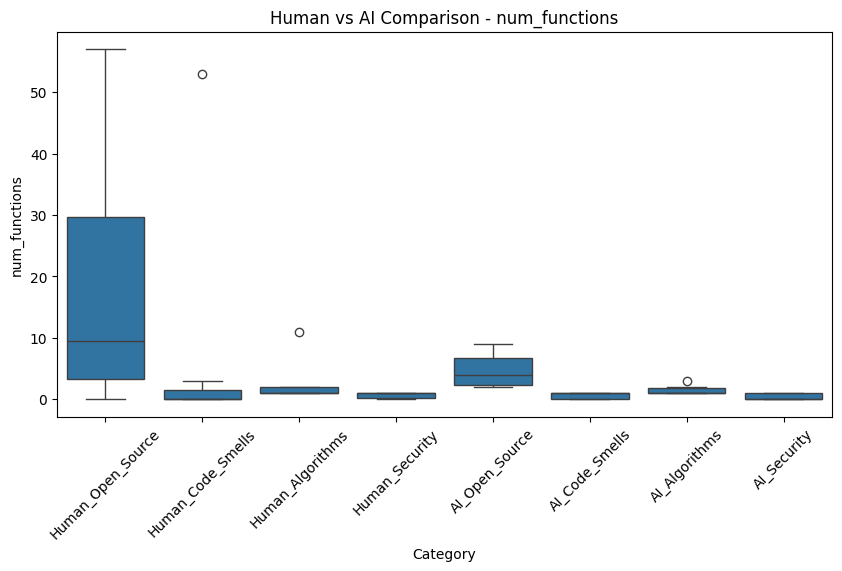

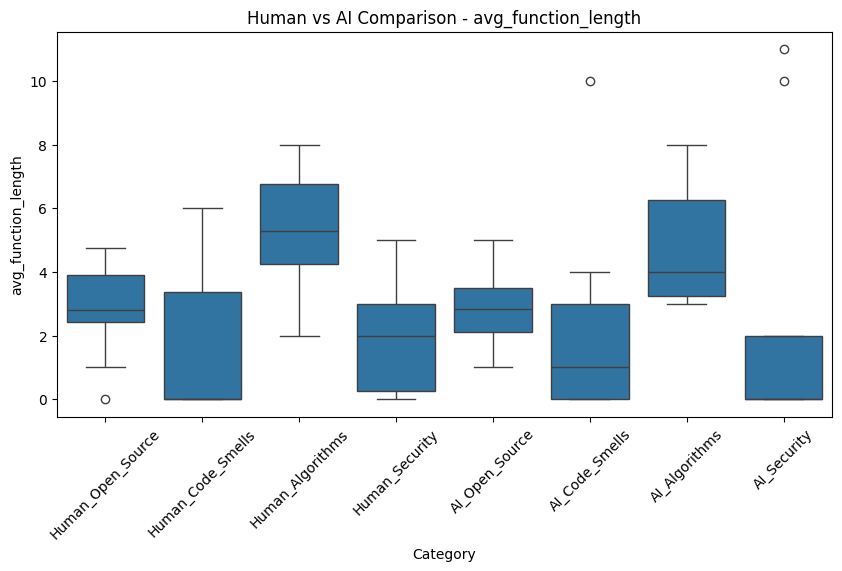

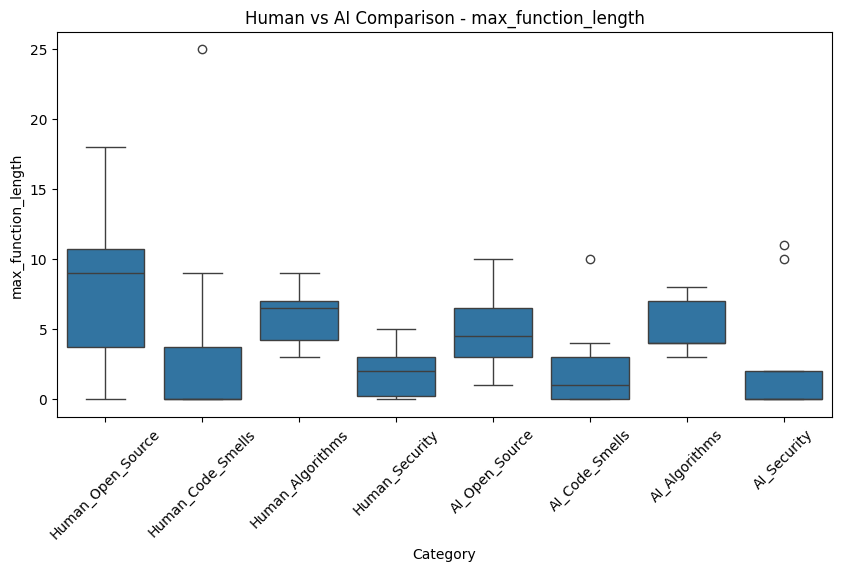

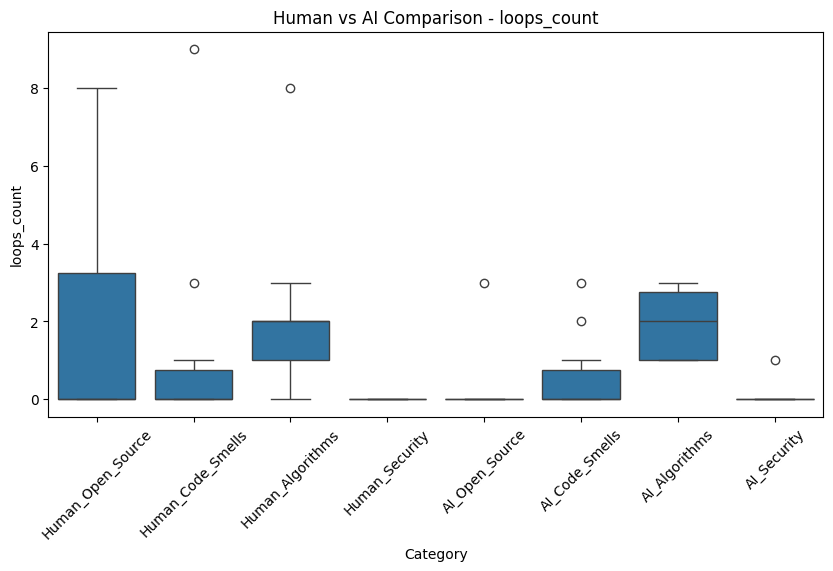

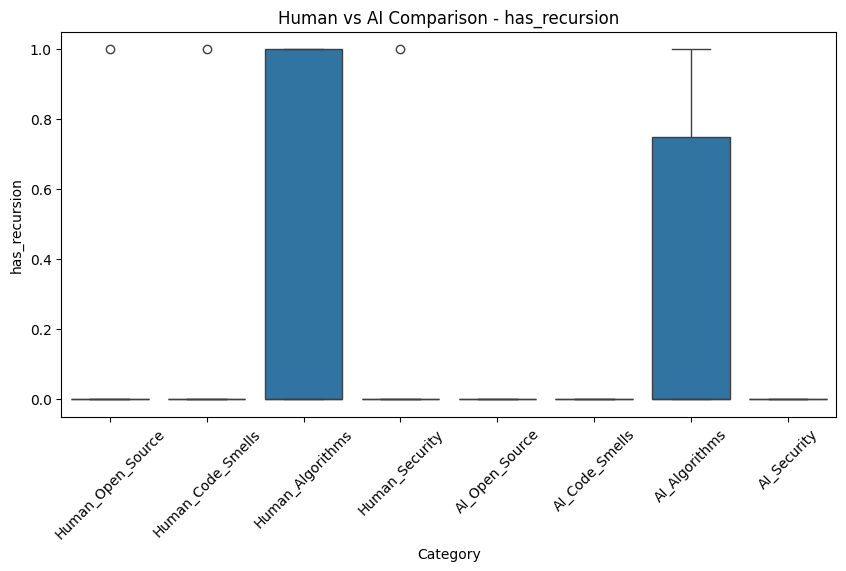

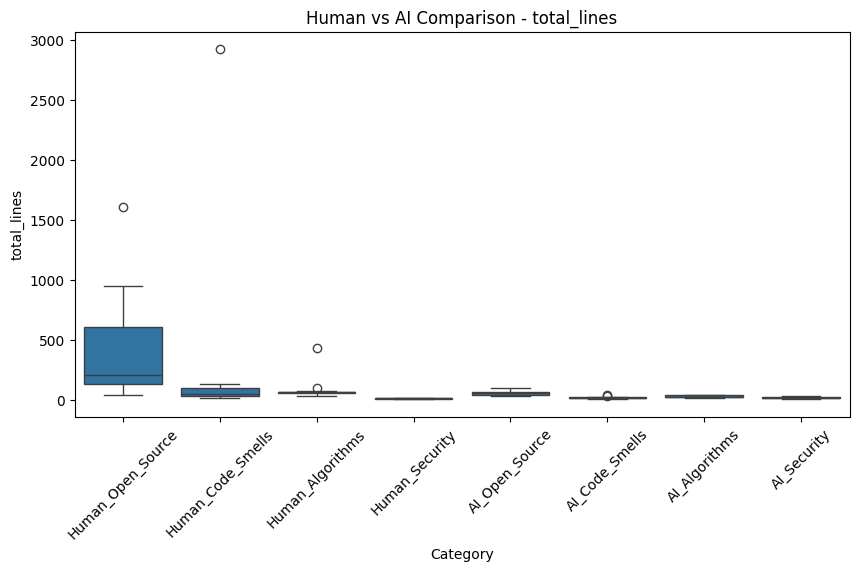

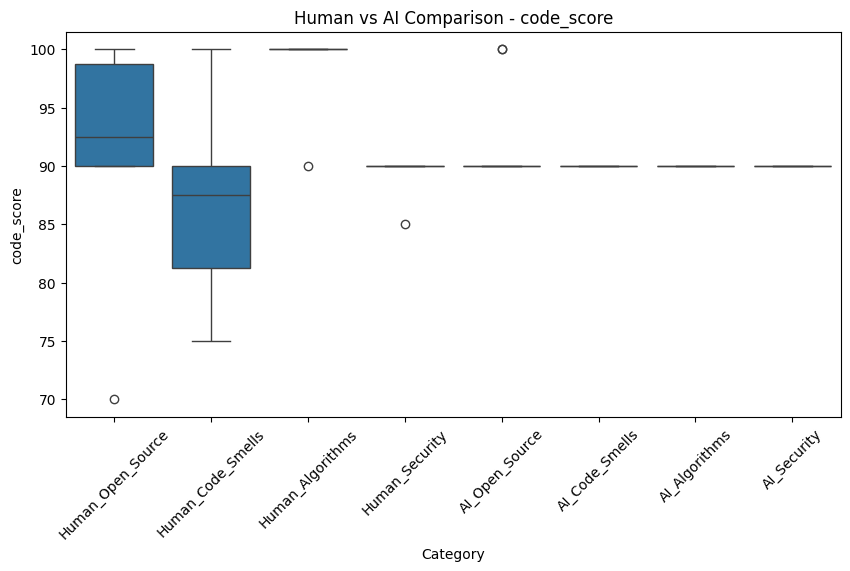

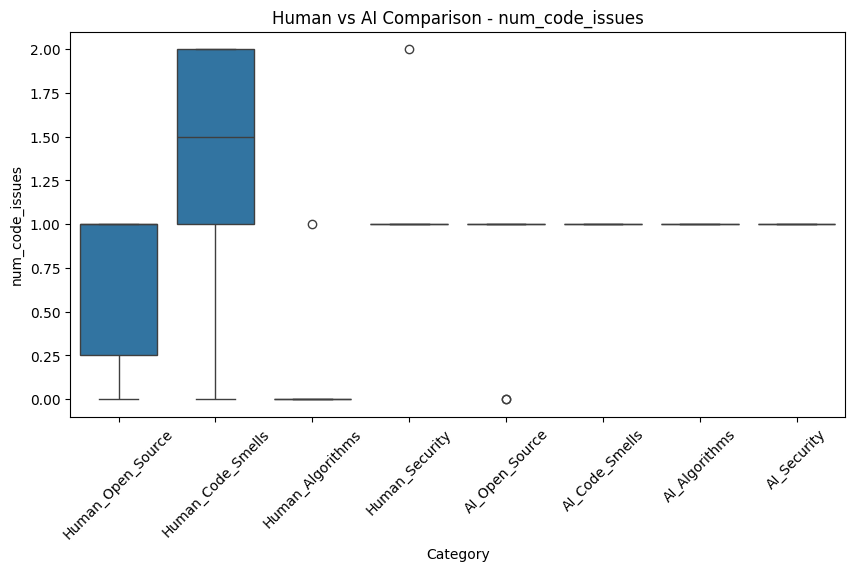

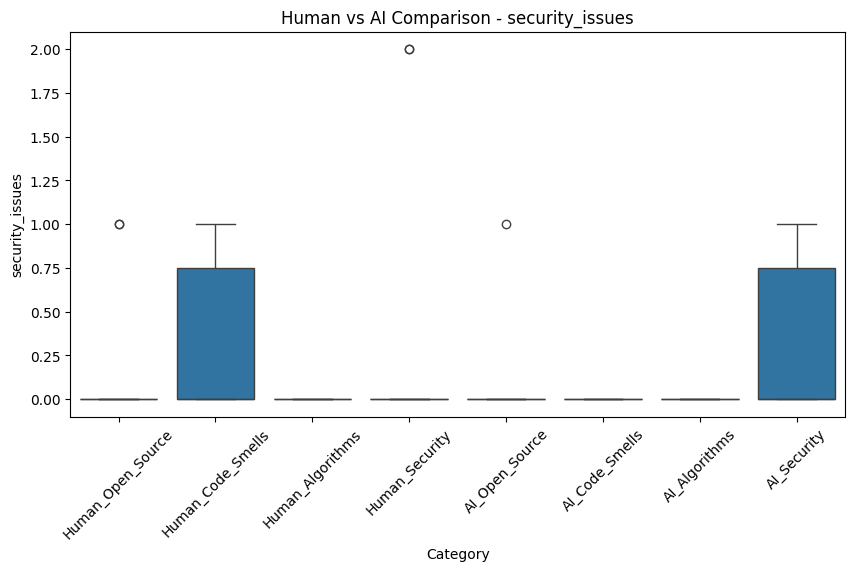

In [ ]:
import pandas as pd

agg_mean = df_results.groupby("Category").mean(numeric_only=True).round(2)
print("Aggregated Comparison Table (Mean):")
print(agg_mean)


agg_median = df_results.groupby("Category").median(numeric_only=True).round(2)
print("\nAggregated Comparison Table (Median):")
print(agg_median)


import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["num_functions","avg_function_length","max_function_length",
                "loops_count","has_recursion","total_lines",
                "code_score", "num_code_issues", "security_issues"]

for col in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x="Category", y=col, data=df_results)
    plt.xticks(rotation=45)
    plt.title(f"Human vs AI Comparison - {col}")
    plt.show()

=== Time & Space Complexity (Mean) ===
                   num_functions  avg_function_length  max_function_length  loops_count  has_recursion  total_lines
Category                                                                                                           
AI_Algorithms                1.4                 4.90                  5.2          1.9            0.3         28.0
AI_Code_Smells               0.6                 2.20                  2.2          0.6            0.0         19.1
AI_Open_Source               4.7                 2.96                  4.8          0.3            0.0         58.1
AI_Security                  0.4                 2.50                  2.5          0.1            0.0         16.0
Human_Algorithms             2.3                 5.36                  6.0          2.2            0.4         97.6
Human_Code_Smells            5.8                 1.59                  3.9          1.3            0.1        343.5
Human_Open_Source           17.7 

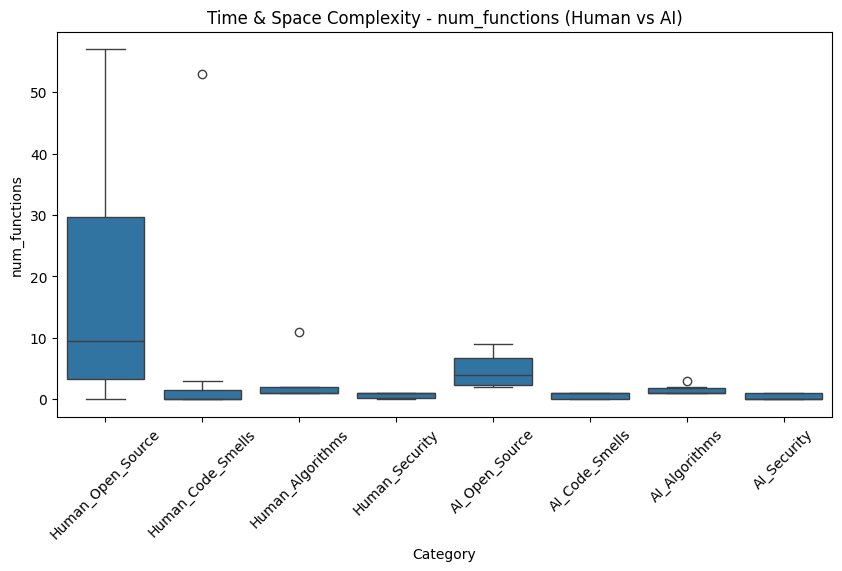

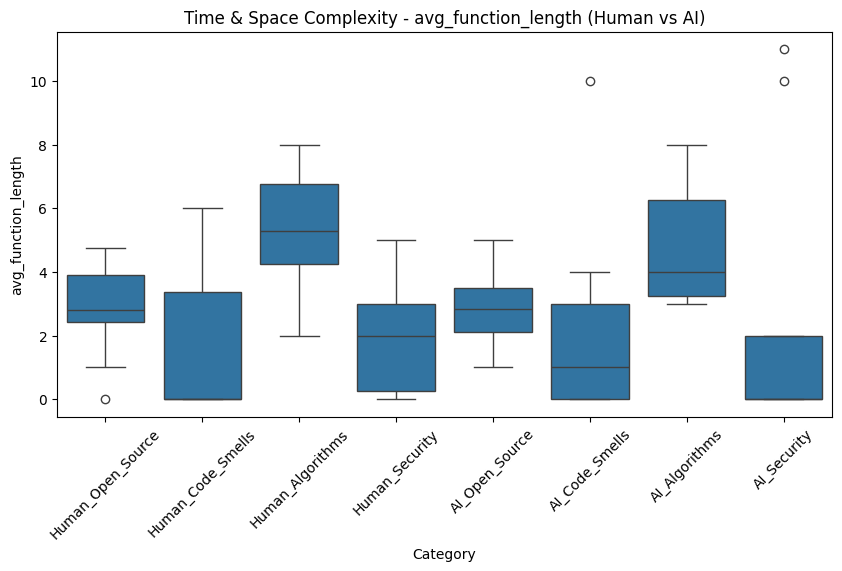

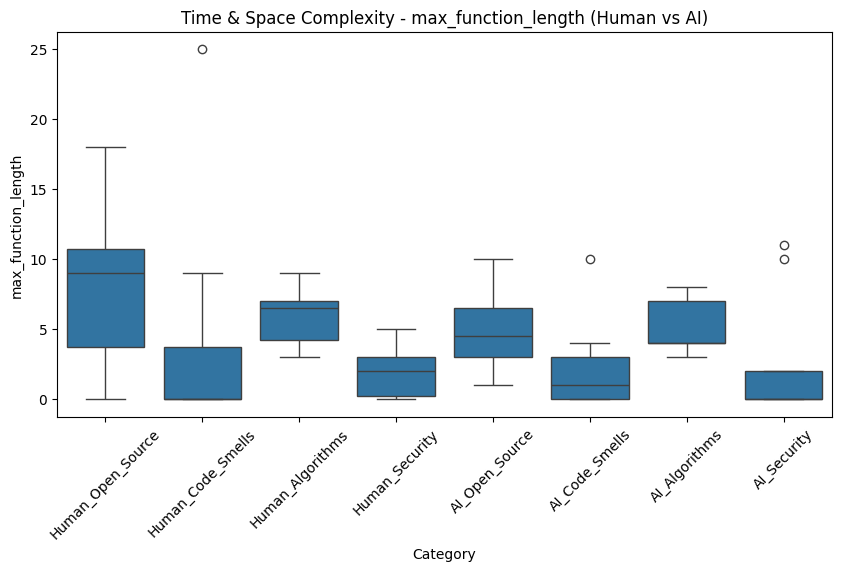

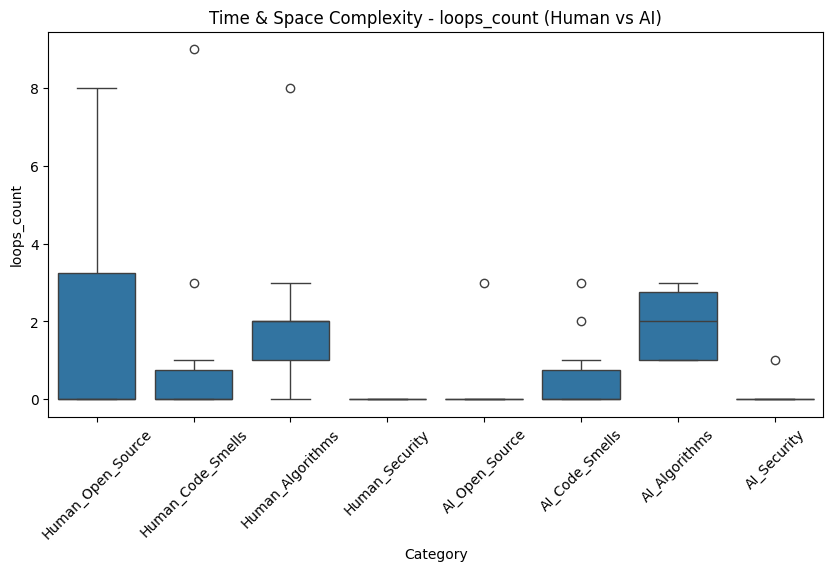

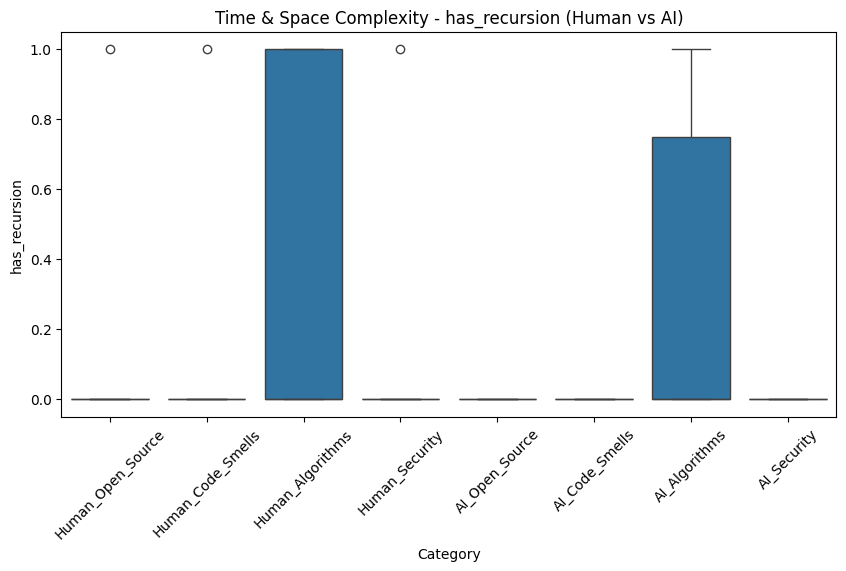

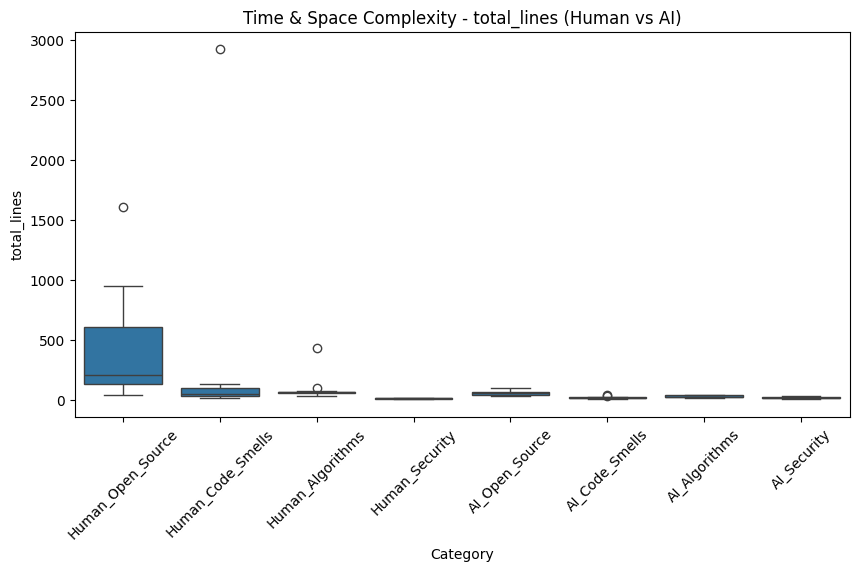

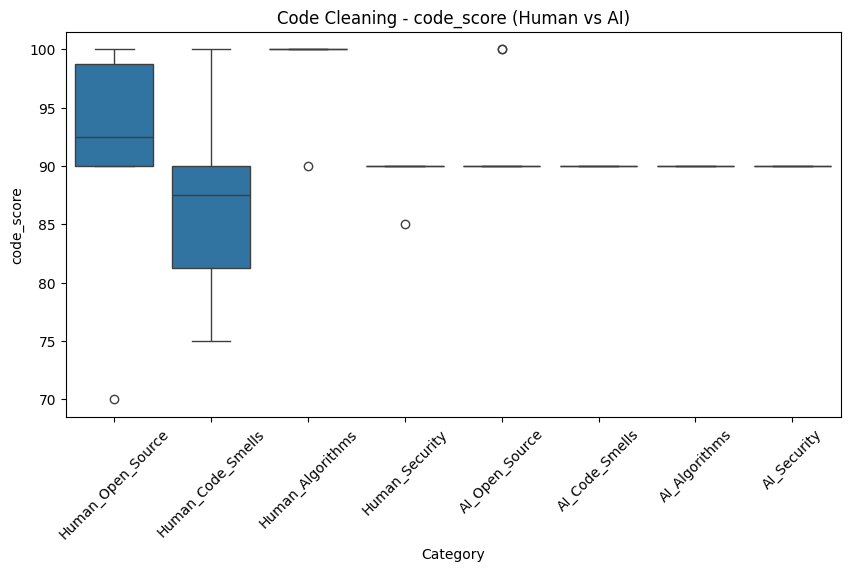

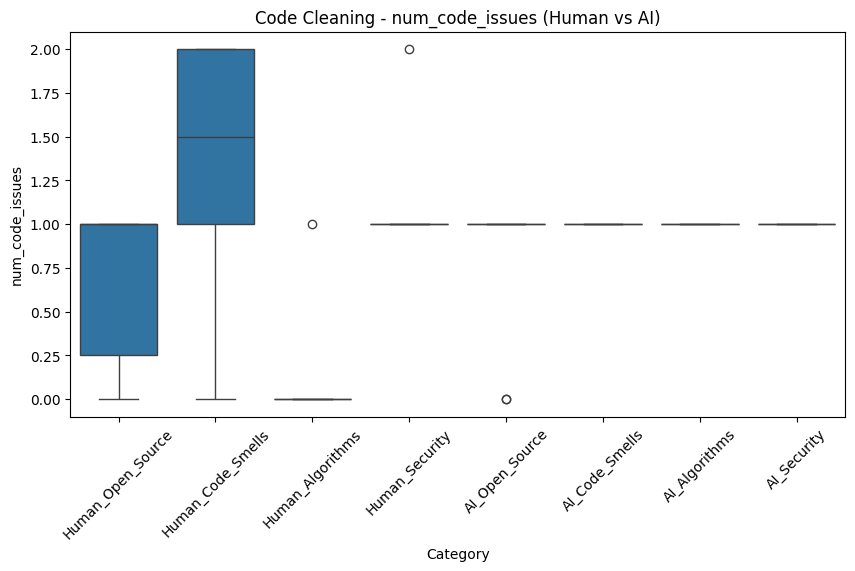

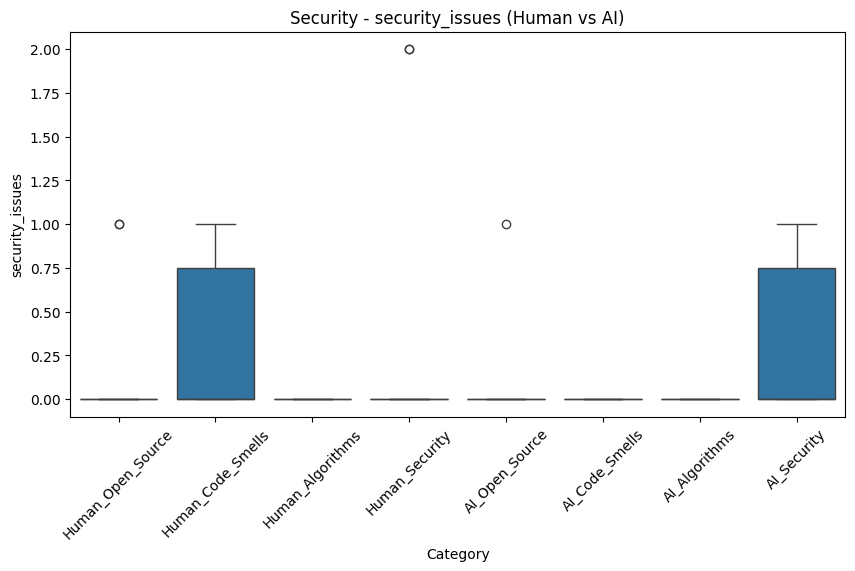

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


time_space_cols = ["num_functions", "avg_function_length", "max_function_length",
                   "loops_count", "has_recursion", "total_lines"]

code_cleaning_cols = ["code_score", "num_code_issues"]

security_cols = ["security_issues"]


def aggregated_table(df, cols, agg_func="mean"):
    if agg_func == "mean":
        return df.groupby("Category")[cols].mean(numeric_only=True).round(2)
    elif agg_func == "median":
        return df.groupby("Category")[cols].median(numeric_only=True).round(2)

# Tables
agg_time_space_mean = aggregated_table(df_results, time_space_cols, "mean")
agg_time_space_median = aggregated_table(df_results, time_space_cols, "median")

agg_code_clean_mean = aggregated_table(df_results, code_cleaning_cols, "mean")
agg_code_clean_median = aggregated_table(df_results, code_cleaning_cols, "median")

agg_security_mean = aggregated_table(df_results, security_cols, "mean")
agg_security_median = aggregated_table(df_results, security_cols, "median")

print("=== Time & Space Complexity (Mean) ===")
print(agg_time_space_mean, "\n")
print("=== Time & Space Complexity (Median) ===")
print(agg_time_space_median, "\n")

print("=== Code Cleaning Indicators (Mean) ===")
print(agg_code_clean_mean, "\n")
print("=== Code Cleaning Indicators (Median) ===")
print(agg_code_clean_median, "\n")

print("=== Security Indicators (Mean) ===")
print(agg_security_mean, "\n")
print("=== Security Indicators (Median) ===")
print(agg_security_median, "\n")


def plot_boxplots(df, cols, title_prefix):
    for col in cols:
        plt.figure(figsize=(10,5))
        sns.boxplot(x="Category", y=col, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{title_prefix} - {col} (Human vs AI)")
        plt.show()

plot_boxplots(df_results, time_space_cols, "Time & Space Complexity")
plot_boxplots(df_results, code_cleaning_cols, "Code Cleaning")
plot_boxplots(df_results, security_cols, "Security")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import re
import numpy as np




base_path = "/content/python_dataset/AI_Code_Review_Project/python_dataset/"

folders = {
    "Human_Open_Source": base_path + "open_source/",
    "Human_Code_Smells": base_path + "code_smells/",
    "Human_Algorithms": base_path + "algorithms/",
    "Human_Security": base_path + "security/",
    "AI_Open_Source": base_path + "ai_generated/open_source/",
    "AI_Code_Smells": base_path + "ai_generated/code_smells/",
    "AI_Algorithms": base_path + "ai_generated/algorithms/",
    "AI_Security": base_path + "ai_generated/security/"
}


def analyze_file_structure(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {
            "num_functions": 0,
            "avg_function_length": 0,
            "max_function_length": 0,
            "loops_count": 0,
            "has_recursion": 0,
            "total_lines": 0
        }

    total_lines = len(code.splitlines())
    try:
        tree = ast.parse(code)
    except:
        return {
            "num_functions": 0,
            "avg_function_length": 0,
            "max_function_length": 0,
            "loops_count": 0,
            "has_recursion": 0,
            "total_lines": total_lines
        }

    func_lengths = []
    loops_count = 0
    has_recursion = 0

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            func_lengths.append(len(node.body))
            for n in ast.walk(node):
                if isinstance(n, (ast.For, ast.While)):
                    loops_count += 1
                if isinstance(n, ast.Call) and isinstance(n.func, ast.Name):
                    if n.func.id == node.name:
                        has_recursion = 1
    if func_lengths:
        avg_func_length = sum(func_lengths)/len(func_lengths)
        max_func_length = max(func_lengths)
    else:
        avg_func_length = 0
        max_func_length = 0

    return {
        "num_functions": len(func_lengths),
        "avg_function_length": round(avg_func_length,2),
        "max_function_length": max_func_length,
        "loops_count": loops_count,
        "has_recursion": has_recursion,
        "total_lines": total_lines
    }


def analyze_code_quality(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {"score": 0, "num_issues": 0, "issues": []}

    score = 100
    issues = []

    long_lines = [i+1 for i, l in enumerate(code.splitlines()) if len(l)>120]
    if long_lines:
        issues.append(f"Long lines at {long_lines}")
        score -= min(len(long_lines)*5, 20)

    try:
        tree = ast.parse(code)
    except SyntaxError:
        issues.append("SyntaxError: Possibly Python 2 code, cannot analyze automatically")
        score -= 30
        return {"score": max(score,0), "num_issues": len(issues), "issues": issues}

    if not ast.get_docstring(tree):
        issues.append("Missing module docstring")
        score -= 10

    return {"score": max(score,0), "num_issues": len(issues), "issues": issues}


def analyze_security(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            code = f.read()
    except:
        return {"security_issues": 0, "issues": []}

    issues = []
    unsafe_funcs = ["eval","exec","os.system","subprocess.Popen"]
    for uf in unsafe_funcs:
        if uf in code:
            issues.append(f"Unsafe function {uf}")

    if re.search(r'password\s*=\s*["\"].*?["\"]', code, re.IGNORECASE):
        issues.append("Hardcoded password")
    if re.search(r'token\s*=\s*["\"].*?["\"]', code, re.IGNORECASE):
        issues.append("Hardcoded token")

    return {"security_issues": len(issues), "issues": issues}


all_results = []

for category, path in folders.items():
    if not os.path.exists(path):
        continue

    files = [f for f in os.listdir(path) if f.endswith(".py")]
    for f in files:
        full_path = os.path.join(path, f)
        struct = analyze_file_structure(full_path)
        code_metrics = analyze_code_quality(full_path)
        sec_metrics = analyze_security(full_path)

        all_results.append({
            "Category": category,
            "File": f,
            **struct,
            "code_score": code_metrics["score"],
            "num_code_issues": code_metrics["num_issues"],
            "security_issues": sec_metrics["security_issues"]
        })

df_results = pd.DataFrame(all_results)



time_space_cols = ["num_functions", "avg_function_length", "max_function_length",
                   "loops_count", "has_recursion", "total_lines"]

code_cleaning_cols = ["code_score", "num_code_issues"]

security_cols = ["security_issues"]


def aggregated_table(df, cols, agg_func="mean"):
    if agg_func == "mean":
        return df.groupby("Category")[cols].mean(numeric_only=True).round(2)
    elif agg_func == "median":
        return df.groupby("Category")[cols].median(numeric_only=True).round(2)


agg_tables = {}


agg_tables["Time_Space_Mean"] = aggregated_table(df_results, time_space_cols, "mean")
agg_tables["Time_Space_Median"] = aggregated_table(df_results, time_space_cols, "median")

# Code Cleaning
agg_tables["Code_Cleaning_Mean"] = aggregated_table(df_results, code_cleaning_cols, "mean")
agg_tables["Code_Cleaning_Median"] = aggregated_table(df_results, code_cleaning_cols, "median")

# Security
agg_tables["Security_Mean"] = aggregated_table(df_results, security_cols, "mean")
agg_tables["Security_Median"] = aggregated_table(df_results, security_cols, "median")


for name, table in agg_tables.items():
    print(f"=== {name.replace('_',' ')} ===")
    print(table, "\n")


with pd.ExcelWriter("Aggregated_Comparison_Tables.xlsx") as writer:
    for name, table in agg_tables.items():
        table.to_excel(writer, sheet_name=name[:31])  # Excel sheet name limit = 31

=== Time Space Mean ===
                   num_functions  avg_function_length  max_function_length  loops_count  has_recursion  total_lines
Category                                                                                                           
AI_Algorithms                1.4                 4.90                  5.2          1.9            0.3         28.0
AI_Code_Smells               0.6                 2.20                  2.2          0.6            0.0         19.1
AI_Open_Source               4.7                 2.96                  4.8          0.3            0.0         58.1
AI_Security                  0.4                 2.50                  2.5          0.1            0.0         16.0
Human_Algorithms             2.3                 5.36                  6.0          2.2            0.4         97.6
Human_Code_Smells            5.8                 1.59                  3.9          1.3            0.1        343.5
Human_Open_Source           17.7                

<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'
<unknown>:10: SyntaxWarning: invalid escape sequence '\s'
<unknown>:67: SyntaxWarning: invalid escape sequence '\s'



===== Time & Space Complexity (Mean) =====
                   num_functions  avg_function_length  max_function_length  loops_count  has_recursion  total_lines
Category                                                                                                           
AI_Algorithms                1.4                 4.90                  5.2          1.9            0.3         28.0
AI_Code_Smells               0.6                 2.20                  2.2          0.6            0.0         19.1
AI_Open_Source               4.7                 2.96                  4.8          0.3            0.0         58.1
AI_Security                  0.4                 2.50                  2.5          0.1            0.0         16.0
Human_Algorithms             2.3                 5.36                  6.0          2.2            0.4         97.6
Human_Code_Smells            5.8                 1.59                  3.9          1.3            0.1        343.5
Human_Open_Source           

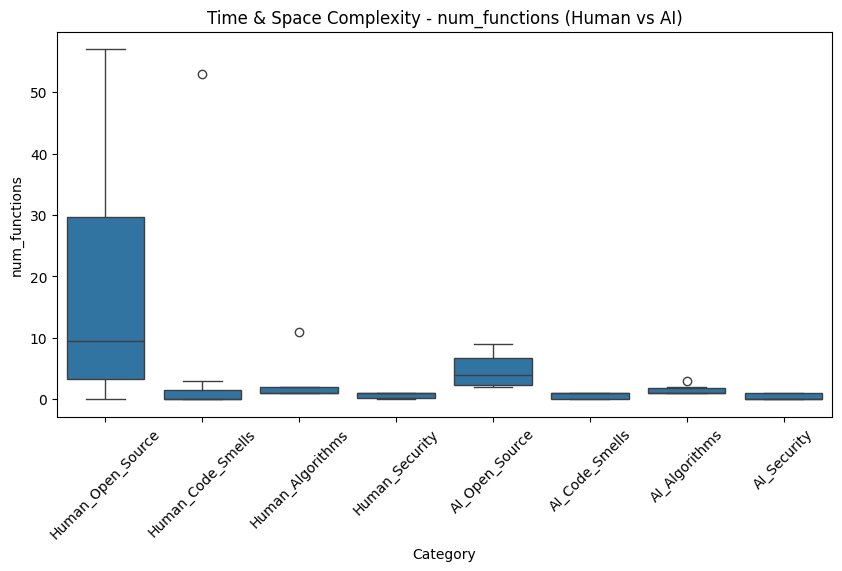

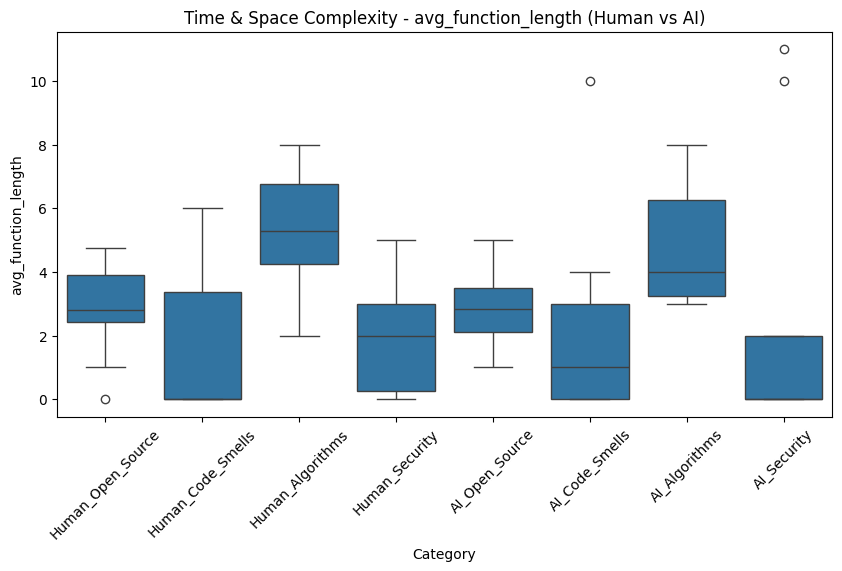

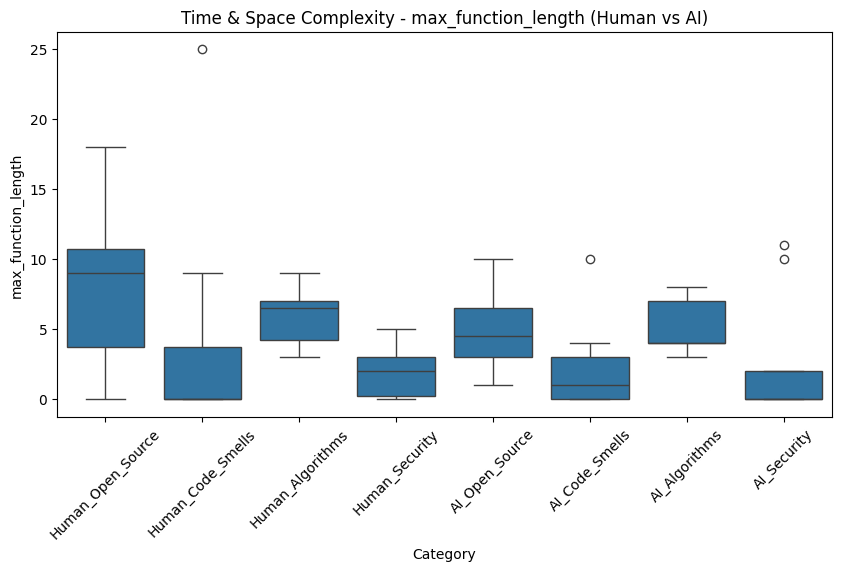

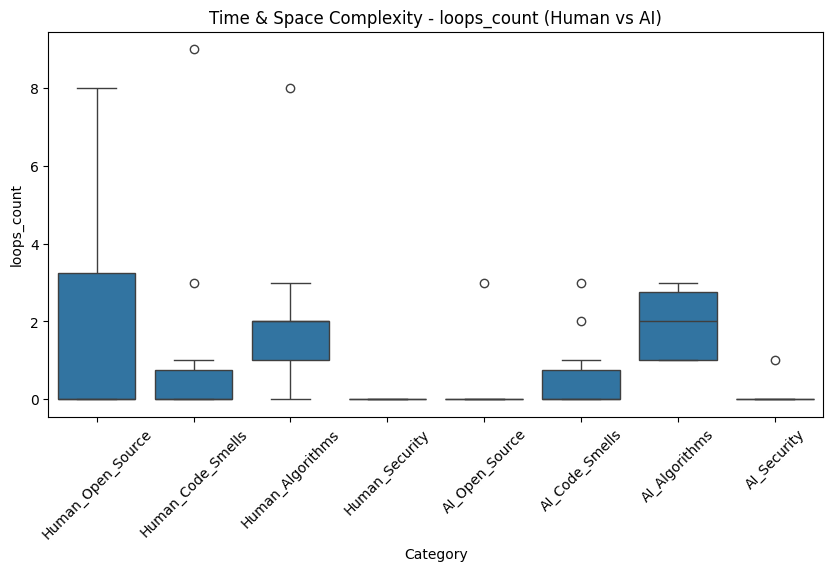

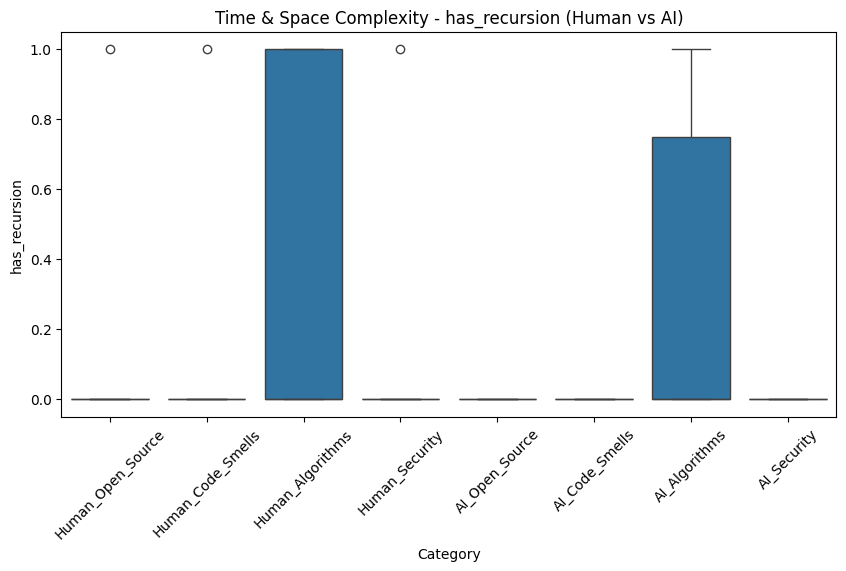

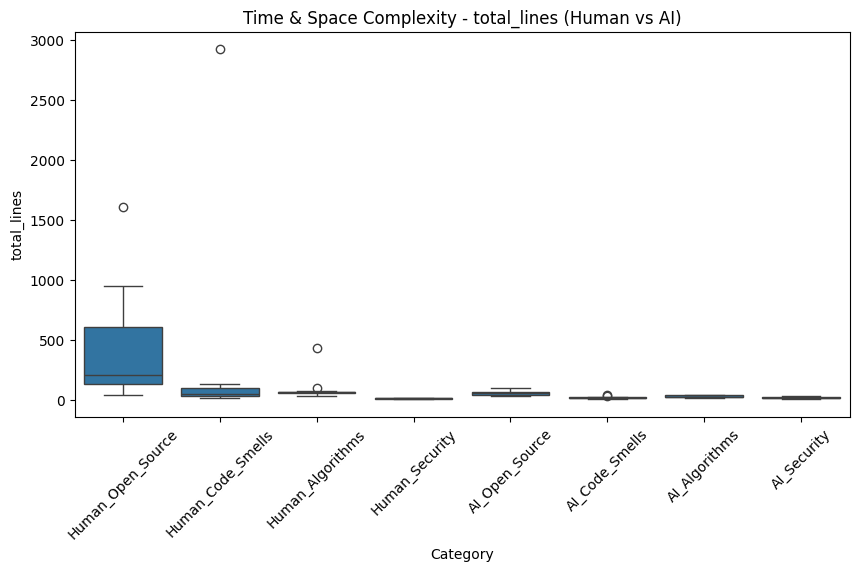

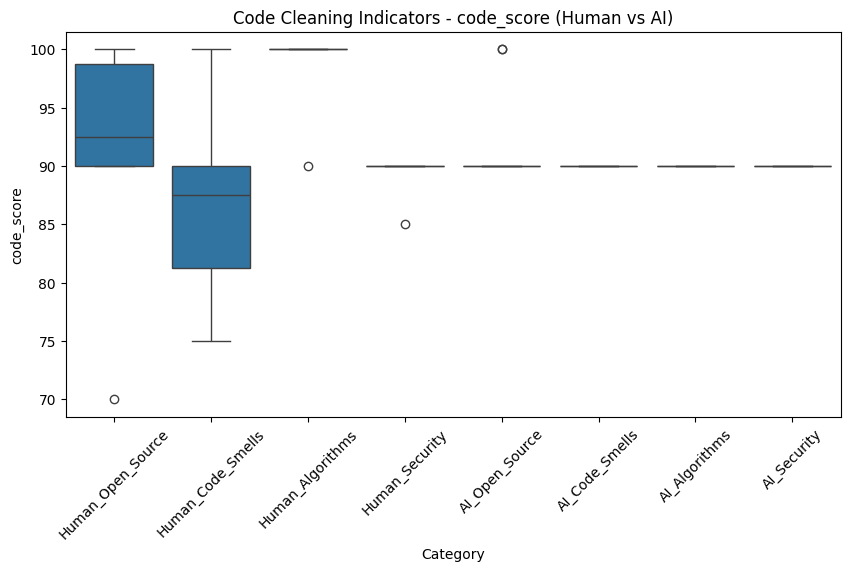

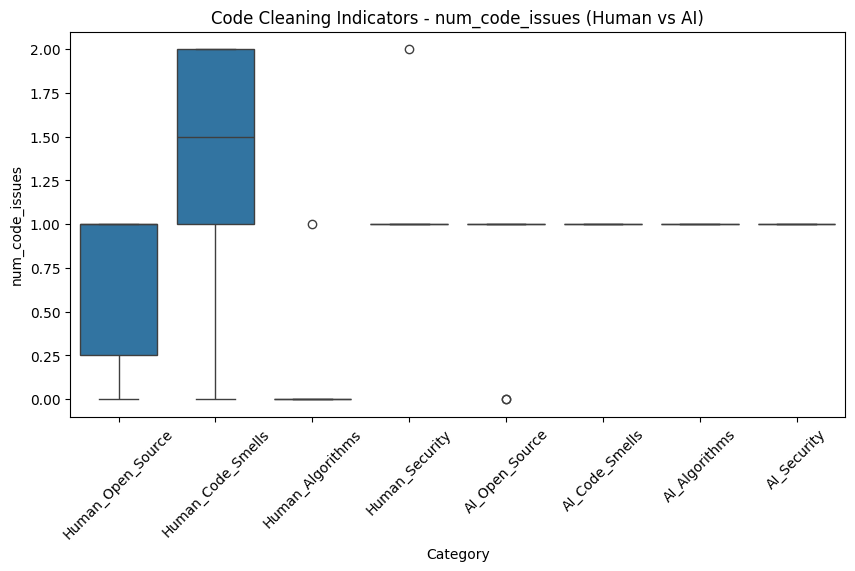

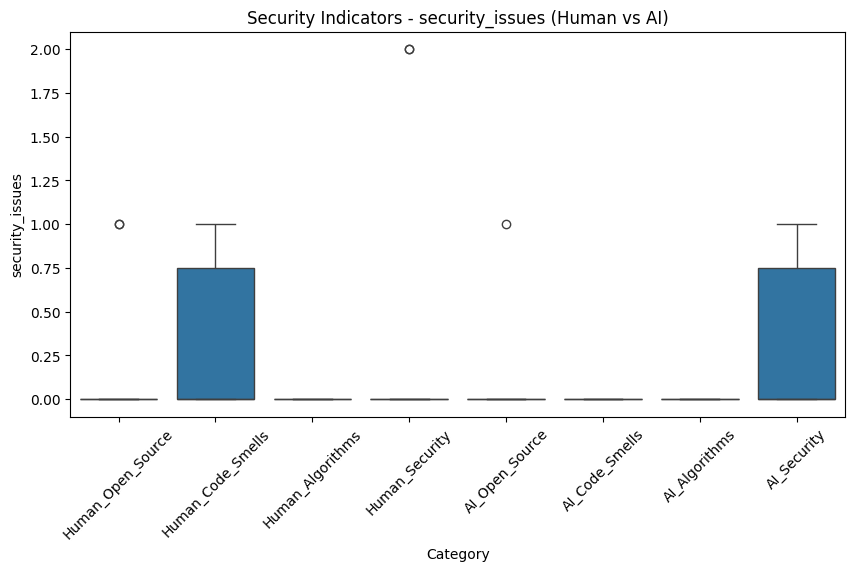

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



time_space_cols = ["num_functions", "avg_function_length", "max_function_length",
                   "loops_count", "has_recursion", "total_lines"]

code_cleaning_cols = ["code_score", "num_code_issues"]

security_cols = ["security_issues"]


def aggregated_table(df, cols, agg_func="mean"):
    if agg_func == "mean":
        return df.groupby("Category")[cols].mean(numeric_only=True).round(2)
    elif agg_func == "median":
        return df.groupby("Category")[cols].median(numeric_only=True).round(2)


def print_aggregated_tables(df):
    sections = {
        "Time & Space Complexity": time_space_cols,
        "Code Cleaning Indicators": code_cleaning_cols,
        "Security Indicators": security_cols
    }

    for section_name, cols in sections.items():
        print(f"\n===== {section_name} (Mean) =====")
        print(aggregated_table(df, cols, "mean"))
        print(f"\n===== {section_name} (Median) =====")
        print(aggregated_table(df, cols, "median"))

print_aggregated_tables(df_results)


def plot_boxplots(df, sections_dict):
    for section_name, cols in sections_dict.items():
        for col in cols:
            plt.figure(figsize=(10,5))
            sns.boxplot(x="Category", y=col, data=df)
            plt.xticks(rotation=45)
            plt.title(f"{section_name} - {col} (Human vs AI)")
            plt.show()

sections_dict = {
    "Time & Space Complexity": time_space_cols,
    "Code Cleaning Indicators": code_cleaning_cols,
    "Security Indicators": security_cols
}

plot_boxplots(df_results, sections_dict)


In [ ]:
import pandas as pd


agg_tables = {}


agg_tables["Time_Space_Mean"] = aggregated_table(df_results, time_space_cols, "mean")
agg_tables["Time_Space_Median"] = aggregated_table(df_results, time_space_cols, "median")


agg_tables["Code_Cleaning_Mean"] = aggregated_table(df_results, code_cleaning_cols, "mean")
agg_tables["Code_Cleaning_Median"] = aggregated_table(df_results, code_cleaning_cols, "median")

# Security
agg_tables["Security_Mean"] = aggregated_table(df_results, security_cols, "mean")
agg_tables["Security_Median"] = aggregated_table(df_results, security_cols, "median")


excel_file = "Aggregated_Comparison_Tables.xlsx"
with pd.ExcelWriter(excel_file) as writer:
    for name, table in agg_tables.items():
        # Excel sheet name limit = 31 chars
        table.to_excel(writer, sheet_name=name[:31])

print(f"✅ All tables saved successfully in '{excel_file}'")


✅ All tables saved successfully in 'Aggregated_Comparison_Tables.xlsx'
